## 0. 와인 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
df = pd.read_csv('winequality-red.csv')

## 1. 데이터셋의 특징

### 1.1 데이터의 정보확인하기

In [4]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


1. 데이터 프레임 크기: 1599행 12열
2. 열 정보: 총 12개의 열이 있으며, 각 열은 다음과 같은 데이터 타입을 가지고 있습니다. (11개의 열은 실수형 (float64), 1개의 열은 정수형 (int64))
3. 결측치 확인: 각 열에 대한 non-null count를 통해 결측치가 없는 것으로 확인됩니다.
4. 메모리 사용량: 이 데이터프레임은 약 150.0KB의 메모리를 사용합니다.
5. 열 이름: 각 열의 이름은 주로 왼쪽에 나열되어 있습니다. 열 이름은 데이터프레임에서 각 열을 식별하는데 사용됩니다.
6. 데이터 타입 변환: 데이터 타입은 주로 숫자형 데이터로 구성됩니다.

In [8]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

count: 해당 열의 총 행 수 (결측치가 아닌 값의 수).

mean: 해당 열의 평균값.

std: 해당 열의 표준 편차 (평균으로부터 얼마나 떨어져 있는지의 측정).

min: 해당 열의 최솟값.

25%: 해당 열의 25번째 백분위수, 즉 1사분위수. 데이터를 작은 순서대로 정렬했을 때 25% 지점에 있는 값.

50%: 해당 열의 중간값 또는 중앙값. 데이터를 작은 순서대로 정렬했을 때 중앙에 있는 값.

75%: 해당 열의 75번째 백분위수, 즉 3사분위수. 데이터를 작은 순서대로 정렬했을 때 75% 지점에 있는 값.

max: 해당 열의 최댓값.

## 2. 데이터의 시각화

### 2.1 종속변수의 분포확인 및 시각화

In [5]:
# 'diagnosis' 열의 각 범주별 데이터 수 확인
quality_counts = df['quality'].value_counts()

# 결과 출력
print(quality_counts)

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64


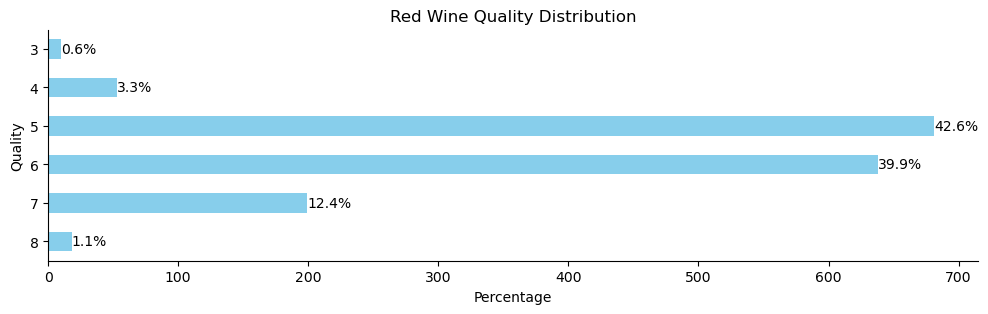

In [9]:
def plot_quality_scores(df, kind):
    ax = df['quality'].value_counts().sort_index().plot.barh(figsize=(12, 3), color='skyblue')
    
    ax.invert_yaxis()

    for bar in ax.patches:
        ax.text(bar.get_width(), bar.get_y() + bar.get_height()/2,
                f'{bar.get_width() / df.shape[0]:.1%}',
                verticalalignment='center')

    plt.title('Red Wine Quality Distribution')
    plt.xlabel('Percentage')
    plt.ylabel('Quality')

    for spine in ['top', 'right']:
        ax.spines[spine].set_visible(False)

    plt.show()

# 함수 호출
plot_quality_scores(wine, '레드')

 'Quality' 변수에서 각 범주별 데이터의 수를 확인하였다. 범주는 3에서 8까지 존재하며 quality가 5와 6일 때 가장 많은 데이터 수가 존재하는 것으로 보입니다. 하나의 범주에 많은 데이터가 치우쳐서 분포하면 KNN 모델이 잘 작동되지 않을 수 있습니다. 클래스 간의 데이터 수가 크게 차이 나면 거리 기반 알고리즘에서는 빈도가 많은 클래스에 더 큰 영향을 받을 수 있습니다. 불균형한 클래스 분포에서는 다양한 클래스 간의 데이터 수 차이를 고려하지 않으면 모델이 불균형한 클래스에 편향될 가능성이 높습니다. 이러한 경우에 샘플링기법이나 가중치를 부여해야하는 경우를 고려해야할 것입니다. (또는 불균형한 클래스에 민감하지 않은 다른 모델을 선택하는 것이 중요하지만, 본 과제는 KNN의 하이퍼파라미터를 수행하는 것이므로 이는 고려하지 않을 것입니다.)

### 2.2 히스토그램

#### 히스토그램(1)

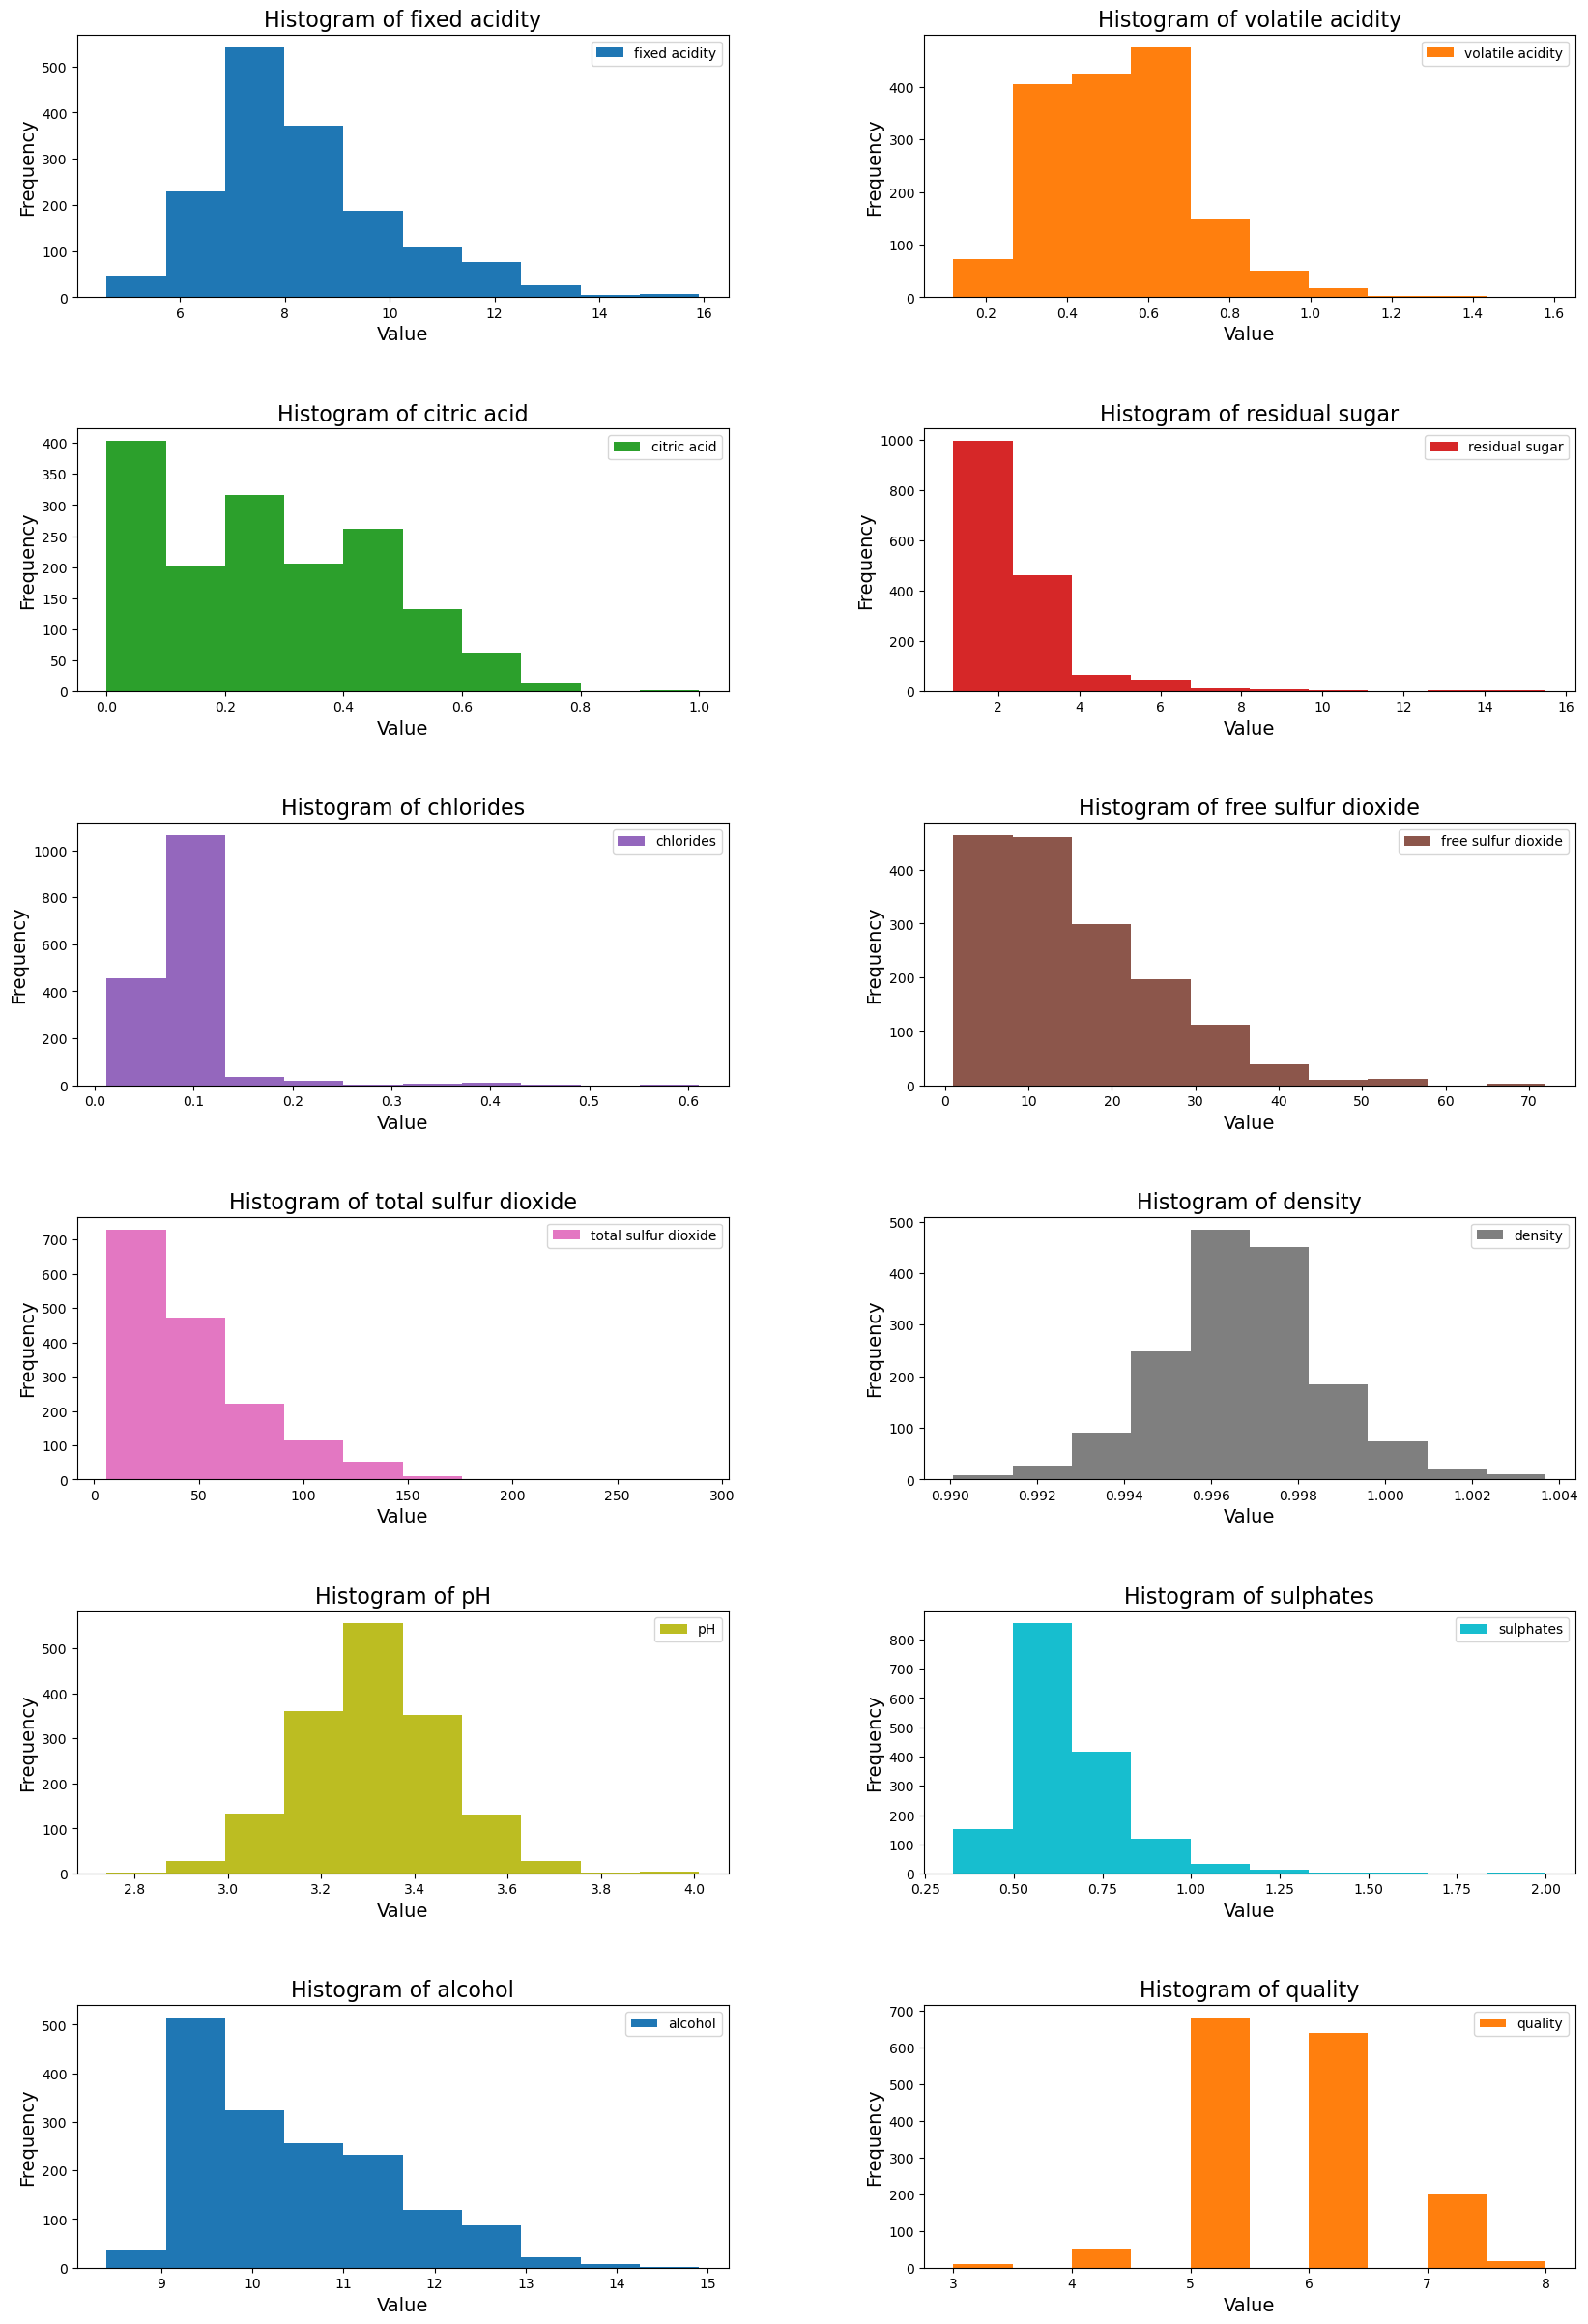

In [23]:
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(20, 30))

# 사용할 색상 정의
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',
          '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
          '#bcbd22', '#17becf', '#1f77b4', '#ff7f0e']


# 각 열에 대해 히스토그램 생성
for index, column in enumerate(df.columns):
    ax = axes.flatten()[index]
    ax.hist(df[column], color=colors[index], label=column)
    ax.legend(loc="best")
    
    # 각 서브플롯에 제목 및 축 레이블 추가
    ax.set_title(f'Histogram of {column}', size=16)
    ax.set_xlabel('Value', size=14)
    ax.set_ylabel('Frequency', size=14)
    
    # 간격 조절
plt.subplots_adjust(hspace=0.5, wspace=0.3)


# 그림 표시
plt.show()

<결과 해석> 이 코드는 데이터프레임 df의 각 열에 대한 히스토그램을 생성하고 서브플롯에 배치하여 시각화합니다. 각 히스토그램은 서로 다른 색상으로 구분되며, 각 열의 이름이 해당 히스토그램의 범례에 표시됩니다. 이를 통해 데이터의 분포를 열 별로 비교하고 분석할 수 있습니다. 'pH'와 '밀도' 변수들의 값은 비교적 정규적으로 분포되어 있습니다.

<각 변수별 해석> "fixed_acidity" 변수의 값은 대부분 7~8 범위입니다;

"volatile_acidity" 변수 값의 대부분은 0.4~0.7 범위입니다;

"citric_acid" 변수의 대부분의 값은 0.0 - 0.1 범위입니다;

"residual_sugar" 변수의 값은 대부분 1 - 2.5 범위입니다;

"chlorides" 변수 값의 대부분은 0.085 - 0.15 범위입니다;

"free_sulfur_dioxide" 변수의 대부분 값은 0 - 15 범위입니다;

"total_sulfur_dioxide" 변수의 대부분의 값은 0 - 30 범위입니다;

"dendity" 변수의 대부분의 값은 0.996 - 0.998 범위입니다;

"pH" 변수 값의 대부분은 3.2~3.4 범위입니다;

"sulphates" 변수의 값은 대부분 0.50 ~ 0.75 범위입니다;

"alcohol" 변수의 값은 대부분 9~10 범위입니다;

"quality" 변수의 대부분의 값은 5와 6입니다.

#### 히스토그램 (2)

히스토그램(1)과 차이점 커널 밀도 추정 그래프(kde)표시 여부

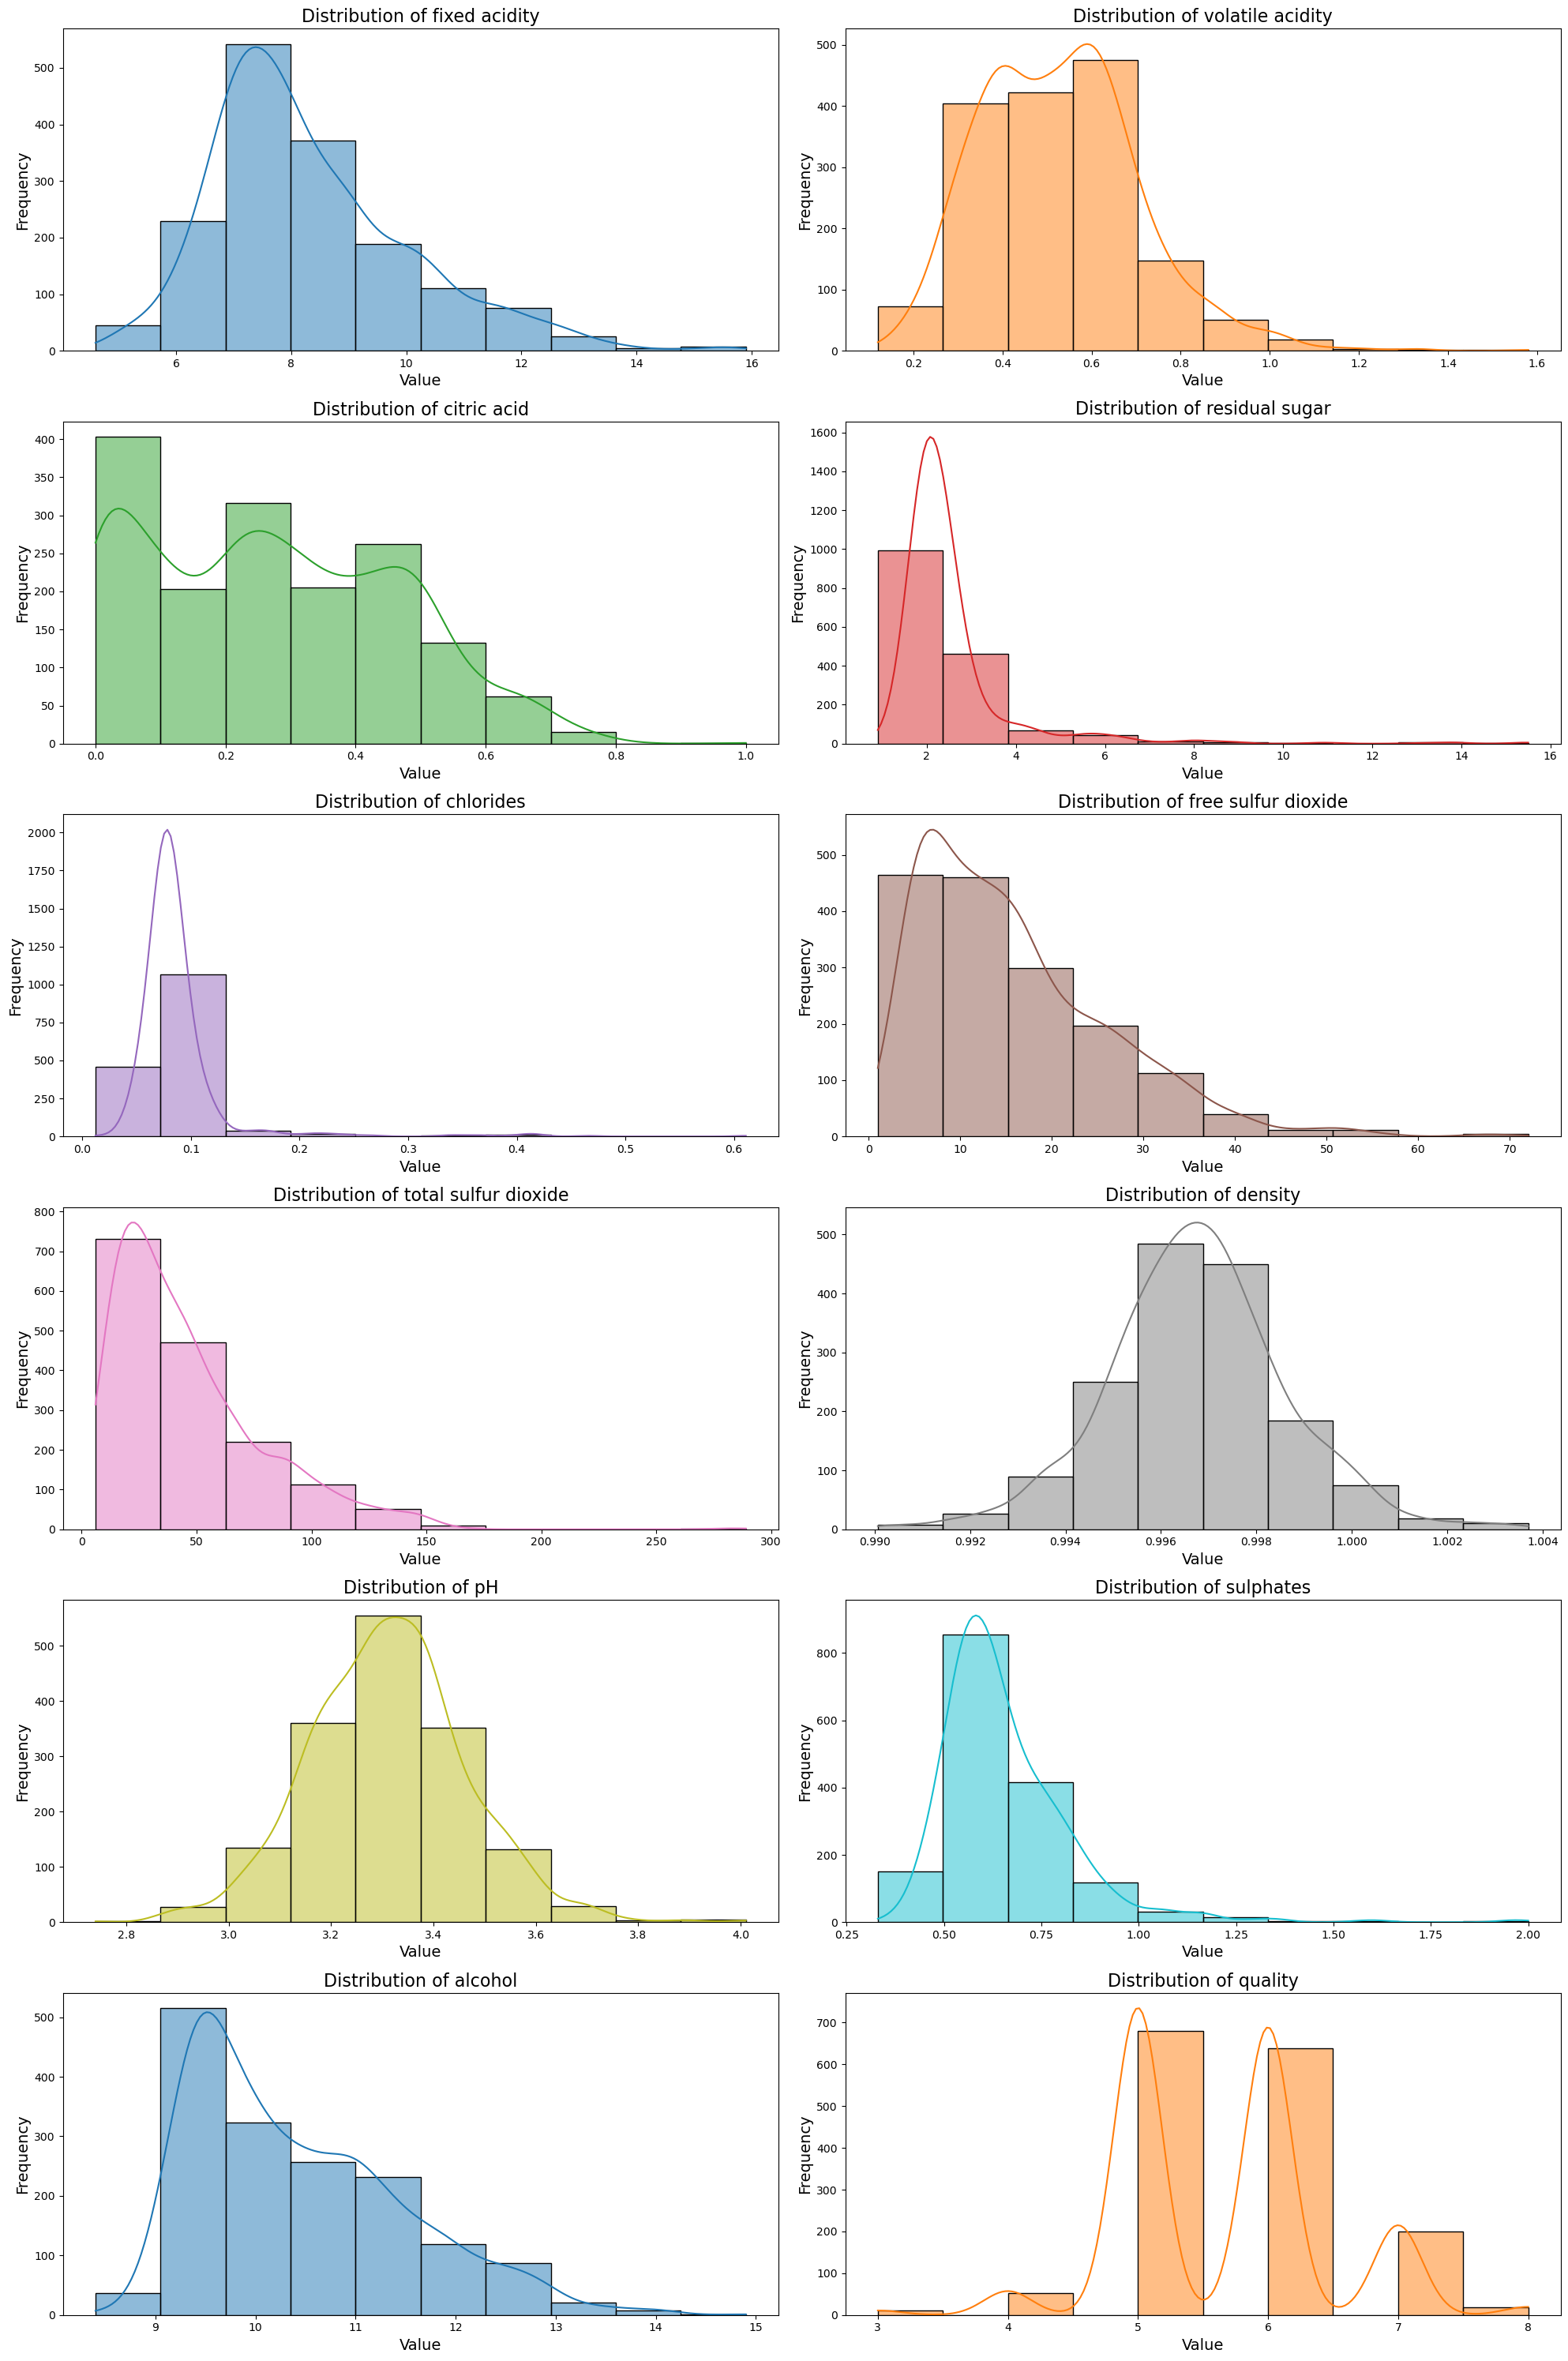

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# 그리드 생성
fig, axes = plt.subplots(6, 2, figsize=(20, 30))

# 사용할 색상 정의
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',
          '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
          '#bcbd22', '#17becf', '#1f77b4', '#ff7f0e']


# 각 열에 대해 히스토그램 생성
for index, column in enumerate(df.columns):
    ax = axes.flatten()[index]
    sns.histplot(ax=ax, x=df[column], bins=10, kde=True, cbar=True, color=colors[index]).set(
        title=f'Distribution of {column}',
        xlabel='Value',
        ylabel='Frequency'
    )

    # 각 서브플롯에 제목 및 축 레이블 추가
    ax.set_title(f'Distribution of {column}', size=16)
    ax.set_xlabel('Value', size=14)
    ax.set_ylabel('Frequency', size=14)
    
plt.subplots_adjust(hspace=0.5, wspace=0.3)

# 그림 표시
plt.tight_layout()
plt.show()

<결과 해석>

정규 분포 : 도수분포곡선이 평균값을 중앙으로 하여 좌우대칭인 종 모양을 이루는 것
이를 통해 volatile_acidity, citric_acid, residual_sugar, chlorides, free_sulfur_dioxide, total_sulfur_dioxide, alcohol 등은 정규 분포가 아님을 확인할 수 있음.
volatile_acidity, citric_acid는 2개의 피크가 있음

#### 히스토그램 (3)

히스토그램(2)와 차이점 본 히스토그램은 새로 추가한 것으로 각 변수에 있는 데이터의 분포를 좀 더 분석하기 쉽도록, 히스토그램에 평균, 중앙값, 최빈값을 점선으로 표시할 수 있도록 하였다. 그리고 히스토그램의 우상단에는 표준편차, 첨도, 왜도의 값을 표시하였다.

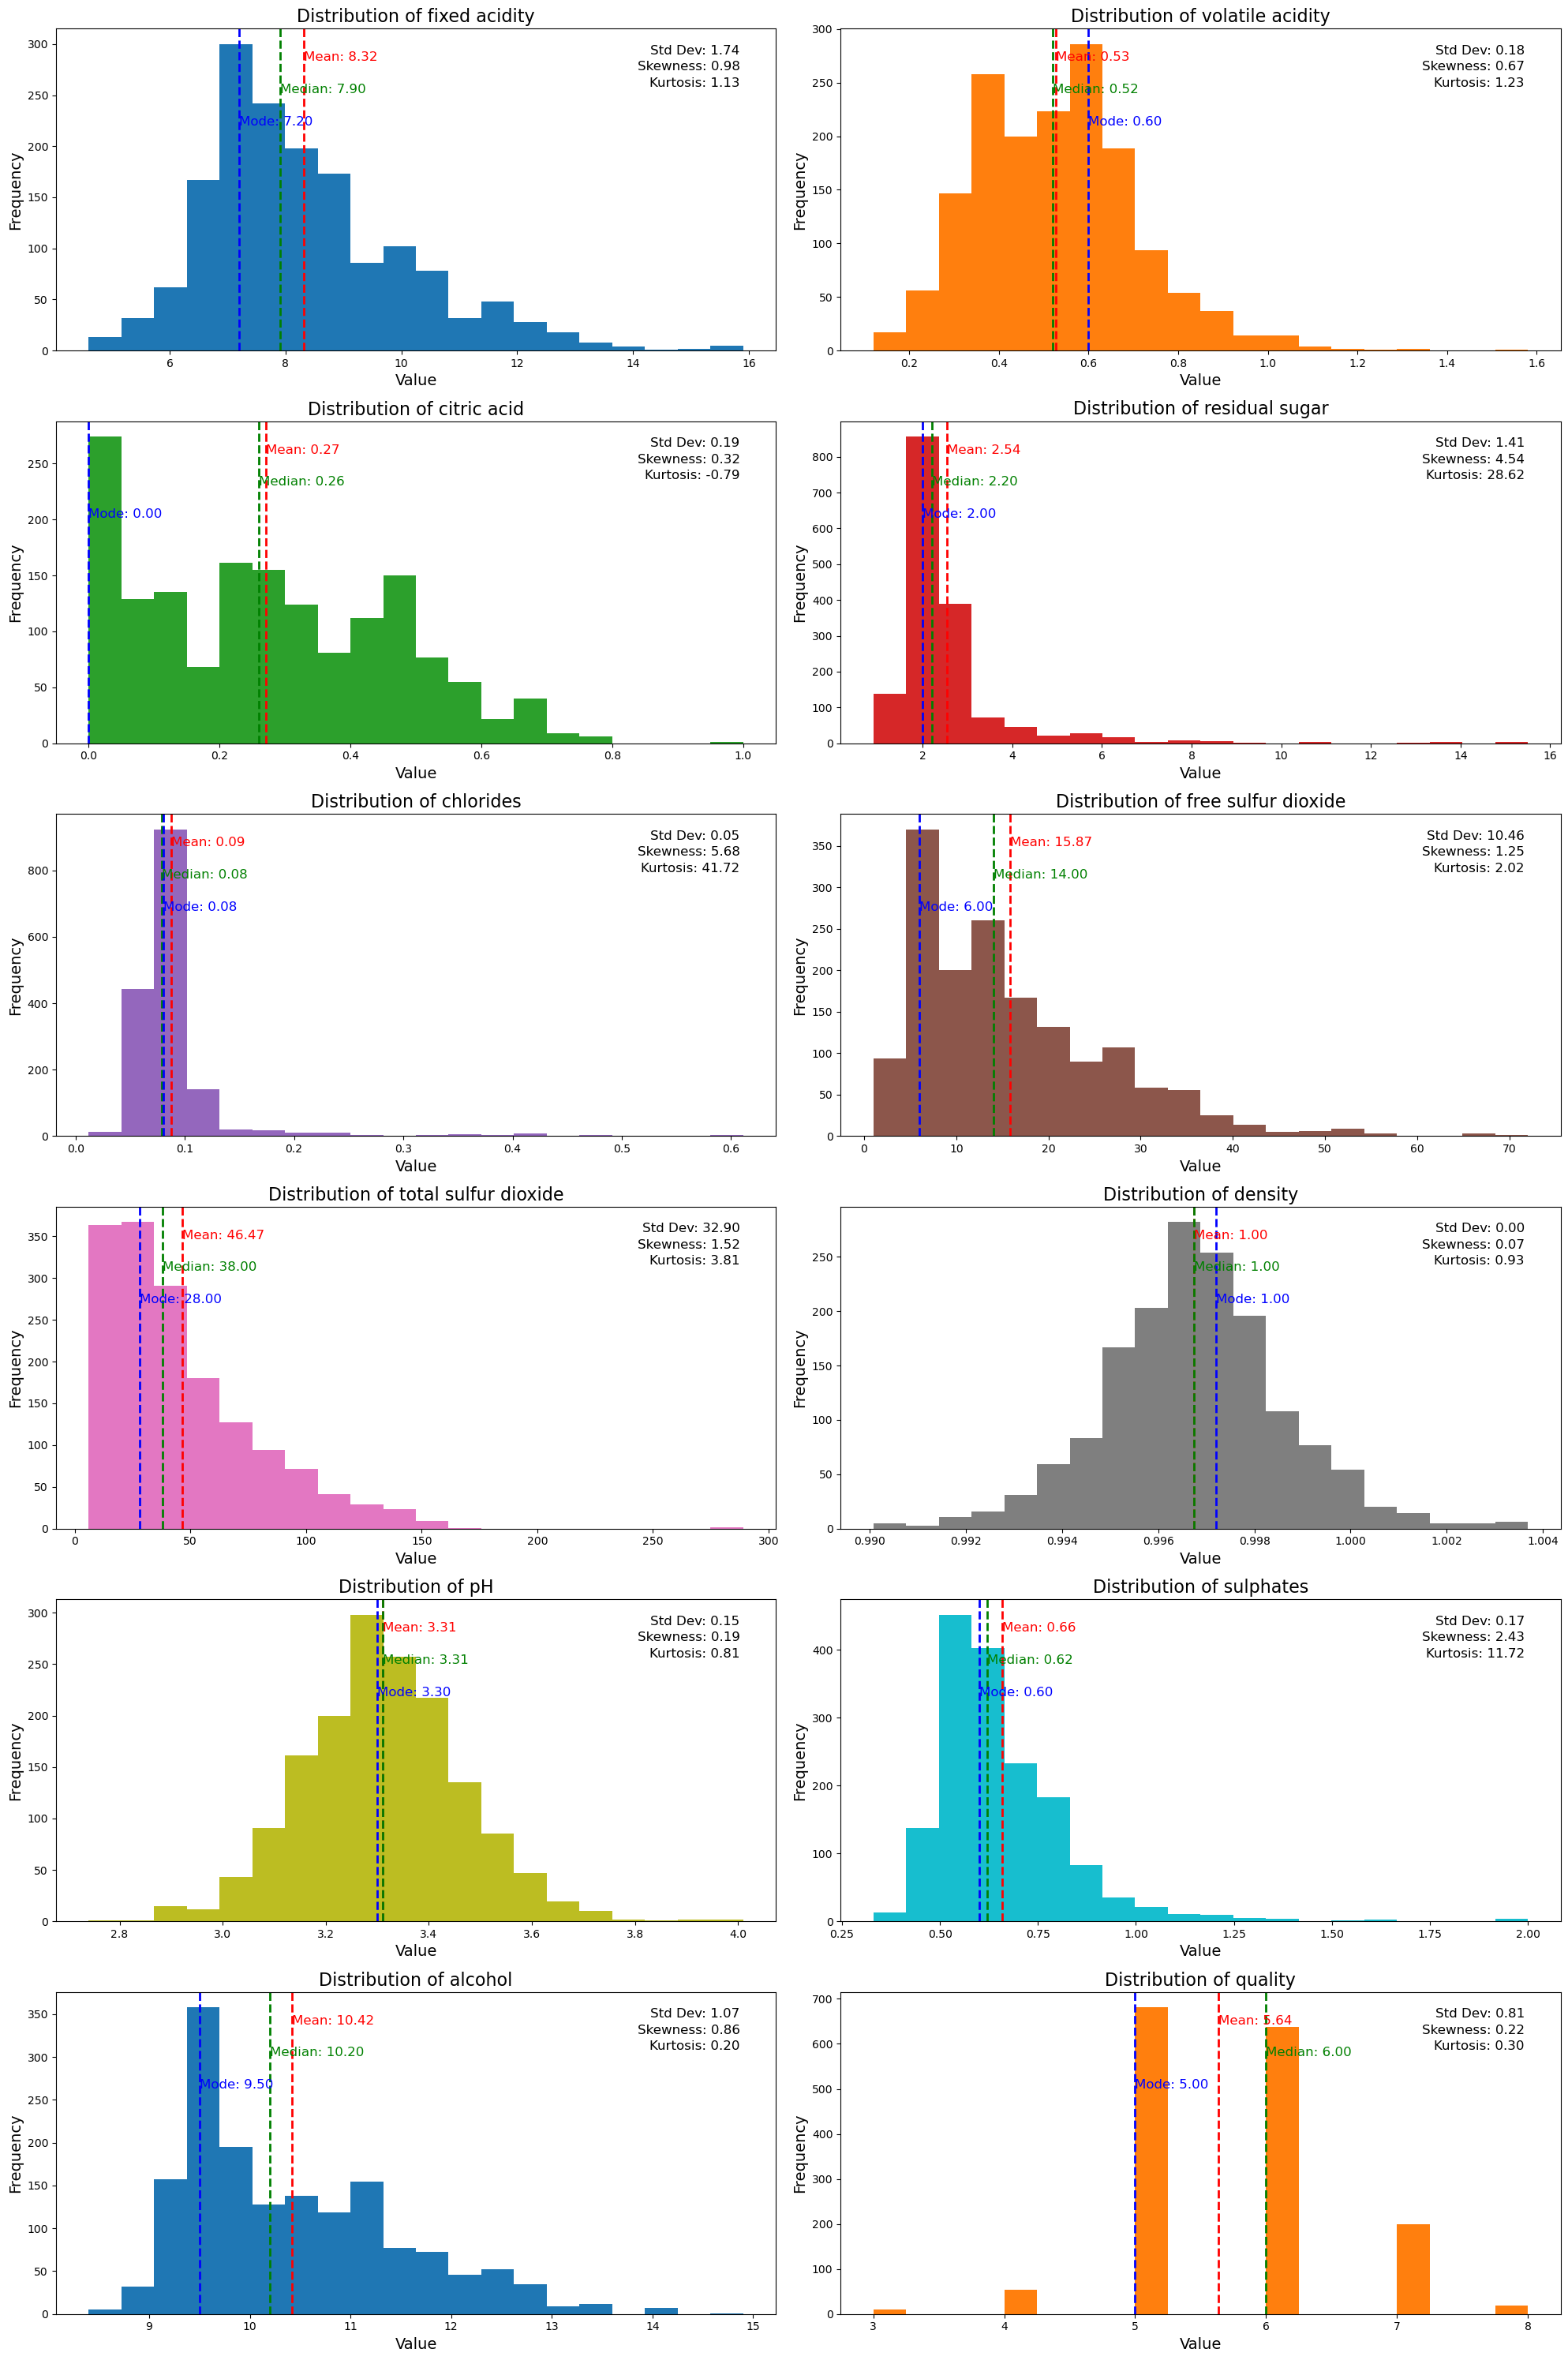

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# 그리드 생성
num_cols = len(df.columns)
num_rows = math.ceil(num_cols / 2)  # 2열로 나누어 그리기

fig, axes = plt.subplots(num_rows, 2, figsize=(20, 30))

# 각 열에 대해 히스토그램 생성
for i, (column, color) in enumerate(zip(df.columns, colors)):
    row_index = i // 2
    col_index = i % 2
    ax = axes[row_index, col_index]
    ax.hist(df[column], bins=20, color=color)  # 히스토그램 색깔 변경
    ax.set_title(f'Distribution of {column}', fontsize=16)
    ax.set_xlabel('Value', fontsize=14)
    ax.set_ylabel('Frequency', fontsize=14)

    # 통계치 계산
    mean_val = df[column].mean()
    median_val = df[column].median()
    mode_val = df[column].mode()[0]  # 최빈값은 mode()의 결과 중 첫 번째 값 사용
    std_dev_val = df[column].std()
    skewness_val = df[column].skew()
    kurtosis_val = df[column].kurtosis()

    # 통계치를 히스토그램 위에 선으로 표시
    ax.axvline(mean_val, color='red', linestyle='dashed', linewidth=2, label='Mean')
    ax.axvline(median_val, color='green', linestyle='dashed', linewidth=2, label='Median')
    ax.axvline(mode_val, color='blue', linestyle='dashed', linewidth=2, label='Mode')  # 색깔 변경
    
    # 통계치 이름 표시
    ax.text(mean_val, ax.get_ylim()[1]*0.9, f'Mean: {mean_val:.2f}', color='red', fontsize=12)
    ax.text(median_val, ax.get_ylim()[1]*0.8, f'Median: {median_val:.2f}', color='green', fontsize=12)
    ax.text(mode_val, ax.get_ylim()[1]*0.7, f'Mode: {mode_val:.2f}', color='blue', fontsize=12)  # 색깔 변경

    # 표준편차, 첨도, 왜도를 히스토그램 오른쪽 상단에 텍스트로 표시
    ax.text(0.95, 0.95, f'Std Dev: {std_dev_val:.2f}', transform=ax.transAxes, ha='right', va='top', fontsize=12)
    ax.text(0.95, 0.90, f'Skewness: {skewness_val:.2f}', transform=ax.transAxes, ha='right', va='top', fontsize=12)
    ax.text(0.95, 0.85, f'Kurtosis: {kurtosis_val:.2f}', transform=ax.transAxes, ha='right', va='top', fontsize=12)

# 남은 subplot 숨기기
for i in range(num_cols, num_rows * 2):
    fig.delaxes(axes.flatten()[i])

# 레이아웃 조정
plt.tight_layout()
plt.show()

아래는 변수들의 통계값을 확인할 수 있도록 요약한 표이다.

In [26]:
import pandas as pd

# 변수별 통계치를 저장할 데이터프레임 생성
summary_df = pd.DataFrame(index=df.columns, columns=['Mean', 'Median', 'Mode', 'Std Dev', 'Skewness', 'Kurtosis'])

# 각 열의 독립변수들의 분포를 서브플롯에 그리기
for column in df.columns:
    # 통계치 계산
    mean_val = df[column].mean()
    median_val = df[column].median()
    mode_val = df[column].mode()[0]  # 최빈값은 mode()의 결과 중 첫 번째 값 사용
    std_dev_val = df[column].std()
    skewness_val = df[column].skew()
    kurtosis_val = df[column].kurtosis()

    # 변수별 통계치 저장
    summary_df.loc[column] = [mean_val, median_val, mode_val, std_dev_val, skewness_val, kurtosis_val]

# 변수별 통계치 출력
print("Variable-wise Summary Statistics:")
summary_df

Variable-wise Summary Statistics:


Mean   Median    Mode    Std Dev  Skewness  \
fixed acidity          8.319637      7.9     7.2   1.741096  0.982751   
volatile acidity       0.527821     0.52     0.6    0.17906  0.671593   
citric acid            0.270976     0.26     0.0   0.194801  0.318337   
residual sugar         2.538806      2.2     2.0   1.409928  4.540655   
chlorides              0.087467    0.079    0.08   0.047065  5.680347   
free sulfur dioxide   15.874922     14.0     6.0  10.460157  1.250567   
total sulfur dioxide  46.467792     38.0    28.0  32.895324  1.515531   
density                0.996747  0.99675  0.9972   0.001887  0.071288   
pH                     3.311113     3.31     3.3   0.154386  0.193683   
sulphates              0.658149     0.62     0.6   0.169507  2.428672   
alcohol               10.422983     10.2     9.5   1.065668  0.860829   
quality                5.636023      6.0       5   0.807569  0.217802   

                       Kurtosis  
fixed acidity          1.132143  
volatile acidity       1.225542  
citric acid           -0.788998  
residual sugar        28.617595  
chlorides             41.715787  
free sulfur dioxide    2.023562  
total sulfur dioxide   3.809824  
density                0.934079  
pH                     0.806943  
sulphates             11.720251  
alcohol                0.200029  
quality                0.296708

<결과 해석>

(1) Fixed Acidity: 표준편차가 1.74로 중간 정도로 흩어져 있음. 첨도가 1.13로 뾰족한 꼬리를 가진 비대칭 분포. 왜도가 0.98로 오른쪽꼬리분포.

(2) Volatile Acidity: 표준편차가 0.18로 낮은 편. 첨도가 1.23로 뾰족한 꼬리를 가진 비대칭 분포. 왜도가 0.67로 오른쪽꼬리분포.

(3) Citric Acid: 표준편차가 0.19로 낮은 편. 첨도가 -0.79로 둥근 꼬리를 가진 비대칭 분포. 왜도가 0.32로 오른쪽꼬리분포.

(4) Residual Sugar: 표준편차가 1.41로 중간 정도로 흩어져 있음. 첨도가 28.62로 매우 뾰족한 꼬리를 가진 매우 비대칭 분포. 왜도가 4.54로 오른쪽꼬리분포.

(5) Chlorides: 표준편차가 0.05로 낮은 편. 첨도가 41.72로 매우 뾰족한 꼬리를 가진 매우 비대칭 분포. 왜도가 5.68로 오른쪽꼬리분표.

(6) Free Sulfur Dioxide: 표준편차가 10.46으로 중간 정도로 흩어져 있음. 첨도가 2.02로 뾰족한 꼬리를 가진 비대칭 분포. 왜도가 1.25로 오른쪽꼬리분포.

(7) Total Sulfur Dioxide: 표준편차가 32.90으로 큰 편. 첨도가 3.81로 뾰족한 꼬리를 가진 비대칭 분포. 왜도가 1.52로 오른쪽꼬리분포.

(8) Density: 표준편차가 0.00로 매우 낮은 편 (거의 변하지 않음). 첨도가 0.93로 둥근 꼬리를 가진 비대칭 분포. 왜도가 0.07로 오른쪽꼬리분포.

(9) pH: 표준편차가 0.15로 낮은 편. 첨도가 0.81로 둥근 꼬리를 가진 비대칭 분포. 왜도가 0.19로 오른쪽꼬리분포.

(10) Sulphates: 표준편차가 0.17로 낮은 편. 첨도가 2.43로 뾰족한 꼬리를 가진 비대칭 분포. 왜도가 11.72로 오른쪽꼬리분포.

(11) Alcohol: 표준편차가 1.07로 중간 정도로 흩어져 있음. 첨도가 0.20로 둥근 꼬리를 가진 비대칭 분포. 왜도가 0.86로 오른쪽꼬리분포.

(12) Quality: 표준편차가 0.81로 중간 정도로 흩어져 있음. 첨도가 0.30로 둥근 꼬리를 가진 비대칭 분포. 왜도가 0.22로 오른쪽꼬리분포.

위의 히스토그램에 나타난 값들을 요약하자면 아래와 같은 표로 나타낼 수 있다

(각 변수들의 평균값/중앙값/최빈값/표준편차/첨도/왜도)

### 2.3 상자그림

#### 상자그림(1)

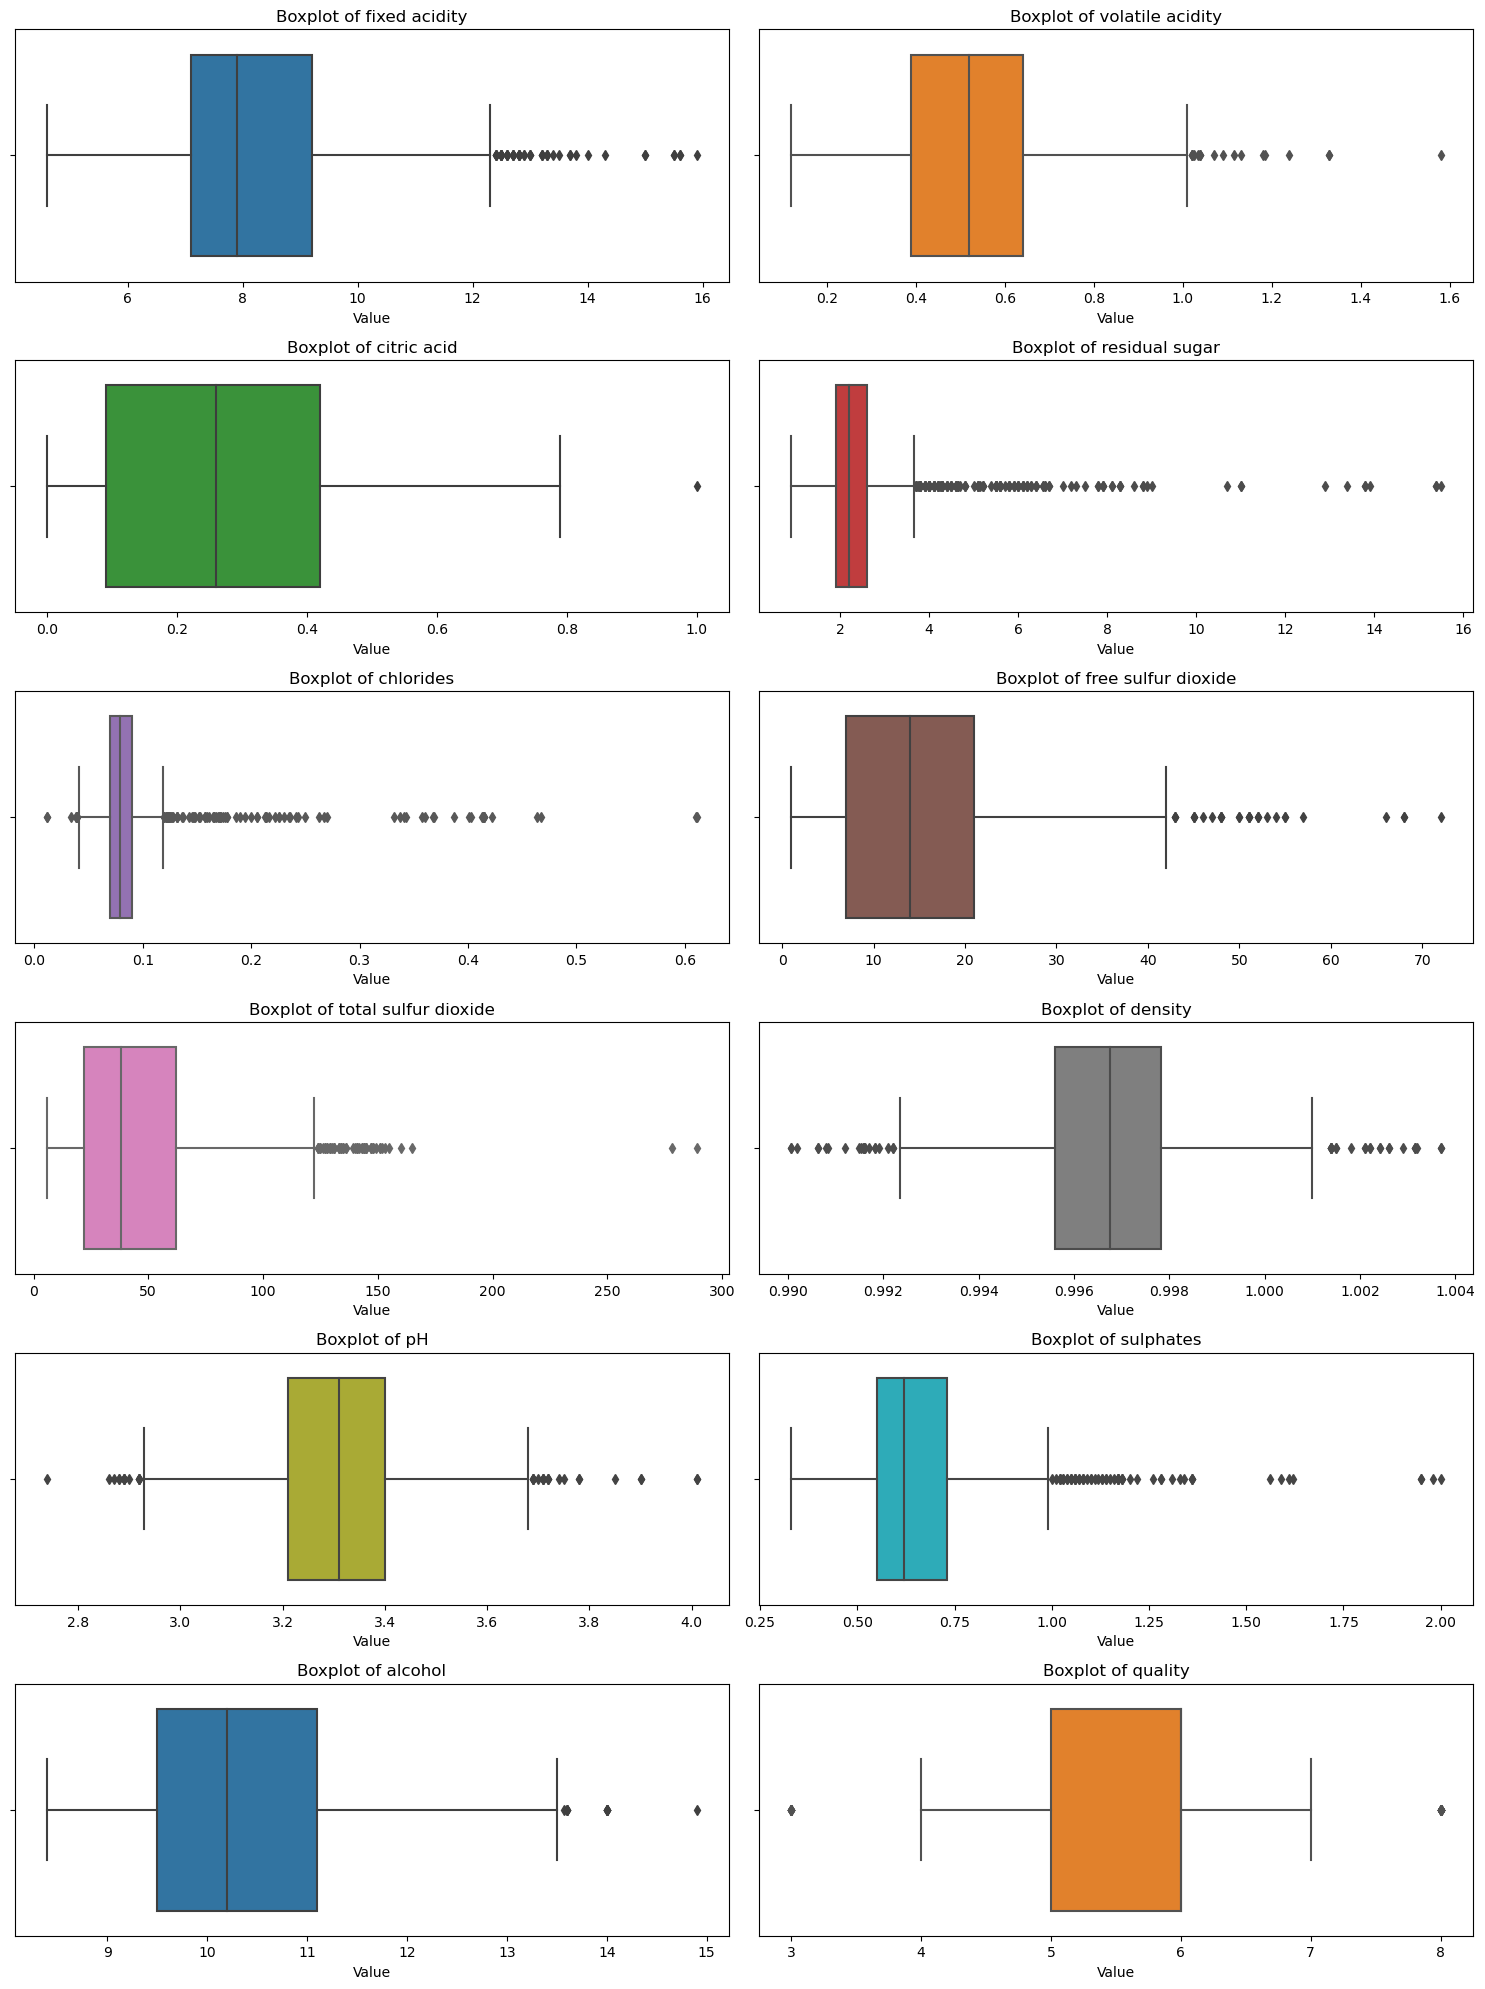

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
import math

# 그리드 생성
num_cols = len(df.columns)
num_rows = math.ceil(num_cols / 2)  # 2열로 나누어 그리기

fig, axes = plt.subplots(num_rows, 2, figsize=(15, 20))

# 각 열의 boxplot을 서브플롯에 그리기
for i, column in enumerate(df.columns):
    row_index = i // 2
    col_index = i % 2
    sns.boxplot(x=df[column], ax=axes[row_index, col_index], color=colors[i % len(colors)])  # 색상 코드 직접 지정
    axes[row_index, col_index].set_title(f'Boxplot of {column}')
    axes[row_index, col_index].set_xlabel('Value')

# 남은 subplot 숨기기
for i in range(num_cols, num_rows * 2):
    fig.delaxes(axes.flatten()[i])

# 레이아웃 조정
plt.tight_layout()
plt.show()

<결과 해석>

이상치(Outlier) 찾을 수 있음
각 변수별 이상치의 개수와 이상치의 범위
+) 이상치를 그대로 둘 것인지, 이상치를 삭제하거나 변환할지 추가적인 의논이 필요한 부분이다. 이상치를 그대로 두었을 때의 데이터간의 상관성과 이상치를 처리했을 때의 상관성을 비교해서 더 적절한 경우를 채택하도록 하자.

(IQR 방법 외에도 이상치를 구별하는 방법은 turkey's fences, Z-score도 있으나 일반적으로 이 방법을 채택한다.)

#### 상자그림(1)에서의 이상치 확인하기

In [30]:
import pandas as pd

# 이상치 확인 함수
def detect_outliers(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = (data < lower_bound) | (data > upper_bound)
    return outliers

# 이상치 개수와 범위 출력을 위한 데이터프레임 생성
outliers_df = pd.DataFrame(index=df.columns, columns=['Outlier Count', 'Outlier Range'])

# 각 변수에 대해 이상치 개수와 범위 계산
for column in df.columns:
    outliers = detect_outliers(df[column])
    outlier_count = outliers.sum()
    outlier_range = f"{df[column][outliers].min()} - {df[column][outliers].max()}"
    
    # 결과 저장
    outliers_df.loc[column] = [outlier_count, outlier_range]

# 결과 출력
print("Outlier Information:")
outliers_df

Outlier Information:


Outlier Count              Outlier Range
fixed acidity                   49                12.4 - 15.9
volatile acidity                19                1.02 - 1.58
citric acid                      1                  1.0 - 1.0
residual sugar                 155                 3.7 - 15.5
chlorides                      112              0.012 - 0.611
free sulfur dioxide             30                43.0 - 72.0
total sulfur dioxide            55              124.0 - 289.0
density                         45          0.99007 - 1.00369
pH                              35                2.74 - 4.01
sulphates                       59                  1.0 - 2.0
alcohol                         13  13.566666666666698 - 14.9
quality                         28                      3 - 8

<결과 해석> fixed_acidity: 49개의 이상치 volatile_acidity: 19개의 이상치 citric_acid: 1개의 이상치 residual_sugar: 155개의 이상치 chlorides: 112개의 이상치 free_sulfur_dioxide: 30개의 이상치 total_sulfur_dioxide: 55개의 이상치 density: 45개의 이상치 pH: 35개의 이상치 sulphates: 59개의 이상치 alcohol: 13개의 이상치 quality: 28개의 이상치
(종속변수에 대한 이상치는 크게 의미있는 값은 아니다, Quality)

*이상치 개수가 높은 변수는 해당 변수의 값이 다른 값들과 크게 벗어난 경우가 많다는 것을 나타냅니다. 따라서 모델을 학습시키기 전에 이상치에 대한 처리를 고려해볼 필요가 있습니다. 예를 들어, 이상치를 제거하거나 대체할 수 있습니다.

#### 상자그림(2)

다음 나타낸 상자그림은 각 독립변수의 quality별로 나타낸 것이다.

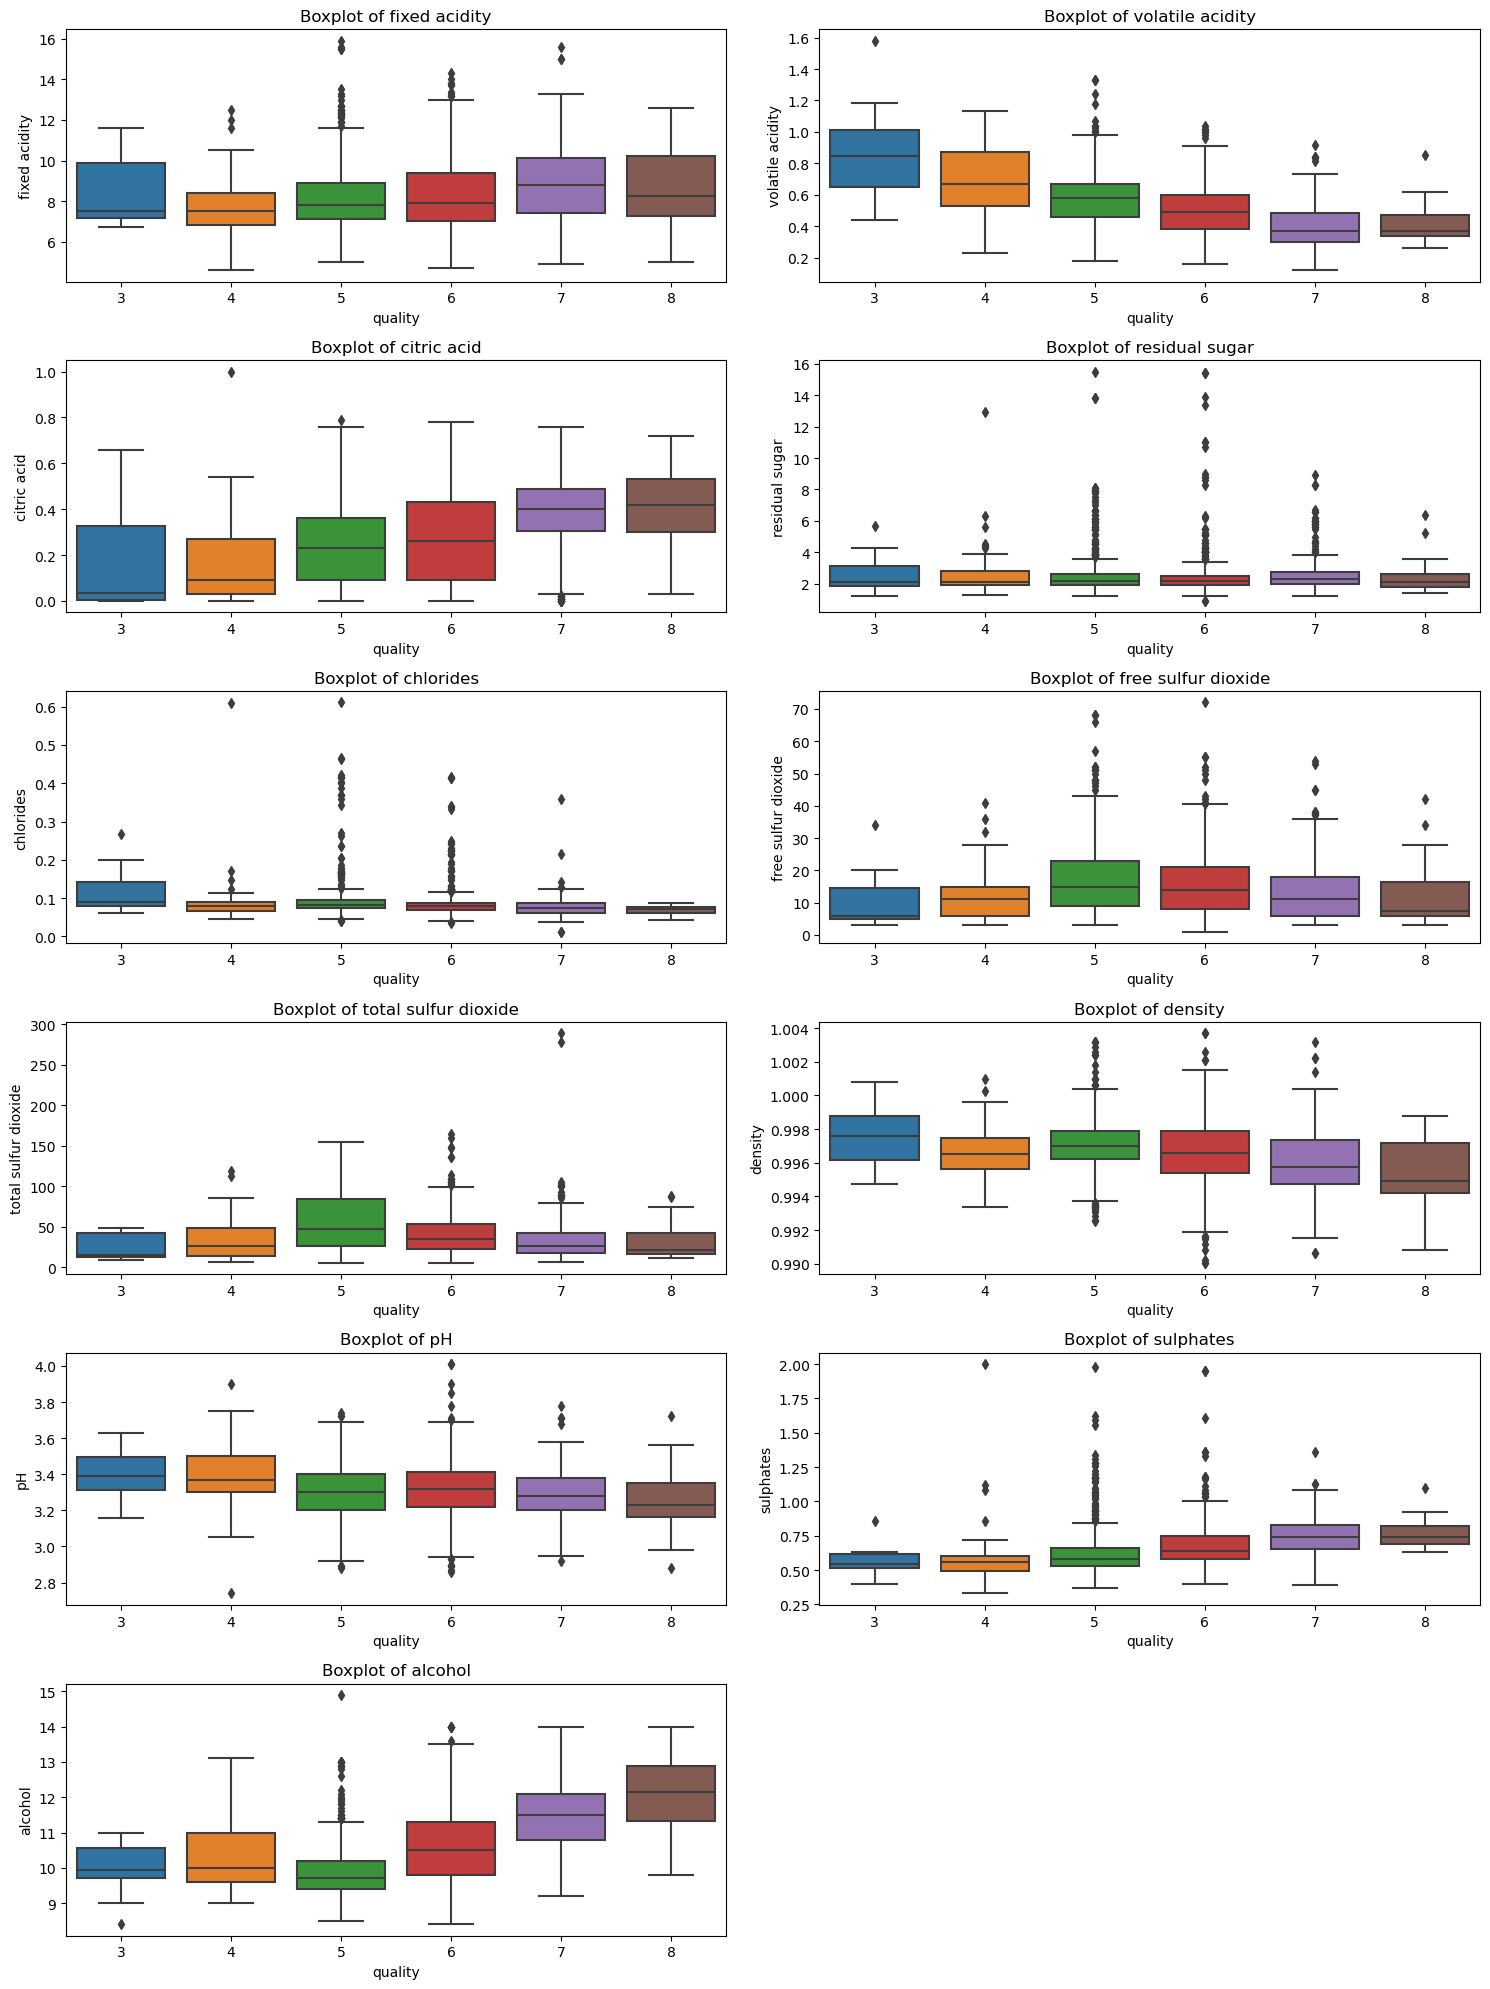

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# 그리드 생성
fig, axes = plt.subplots(6, 2, figsize=(15, 20))

# 각 변수에 대한 상자그림 그리기
for i, column in enumerate(df.columns[df.columns != 'quality']):
    row_index = i // 2
    col_index = i % 2
    sns.boxplot(data=df, x='quality', y=column, palette=colors, ax=axes[row_index, col_index])

    # 각 subplot에 제목 설정
    axes[row_index, col_index].set_title(f'Boxplot of {column}')

# 남은 subplot 숨기기
for i in range(len(df.columns[df.columns != 'quality']), 6 * 2):
    fig.delaxes(axes.flatten()[i])

# 레이아웃 조정
plt.tight_layout()
plt.show()

### 2.4 Violin Plot

#### Violin Plot(1)

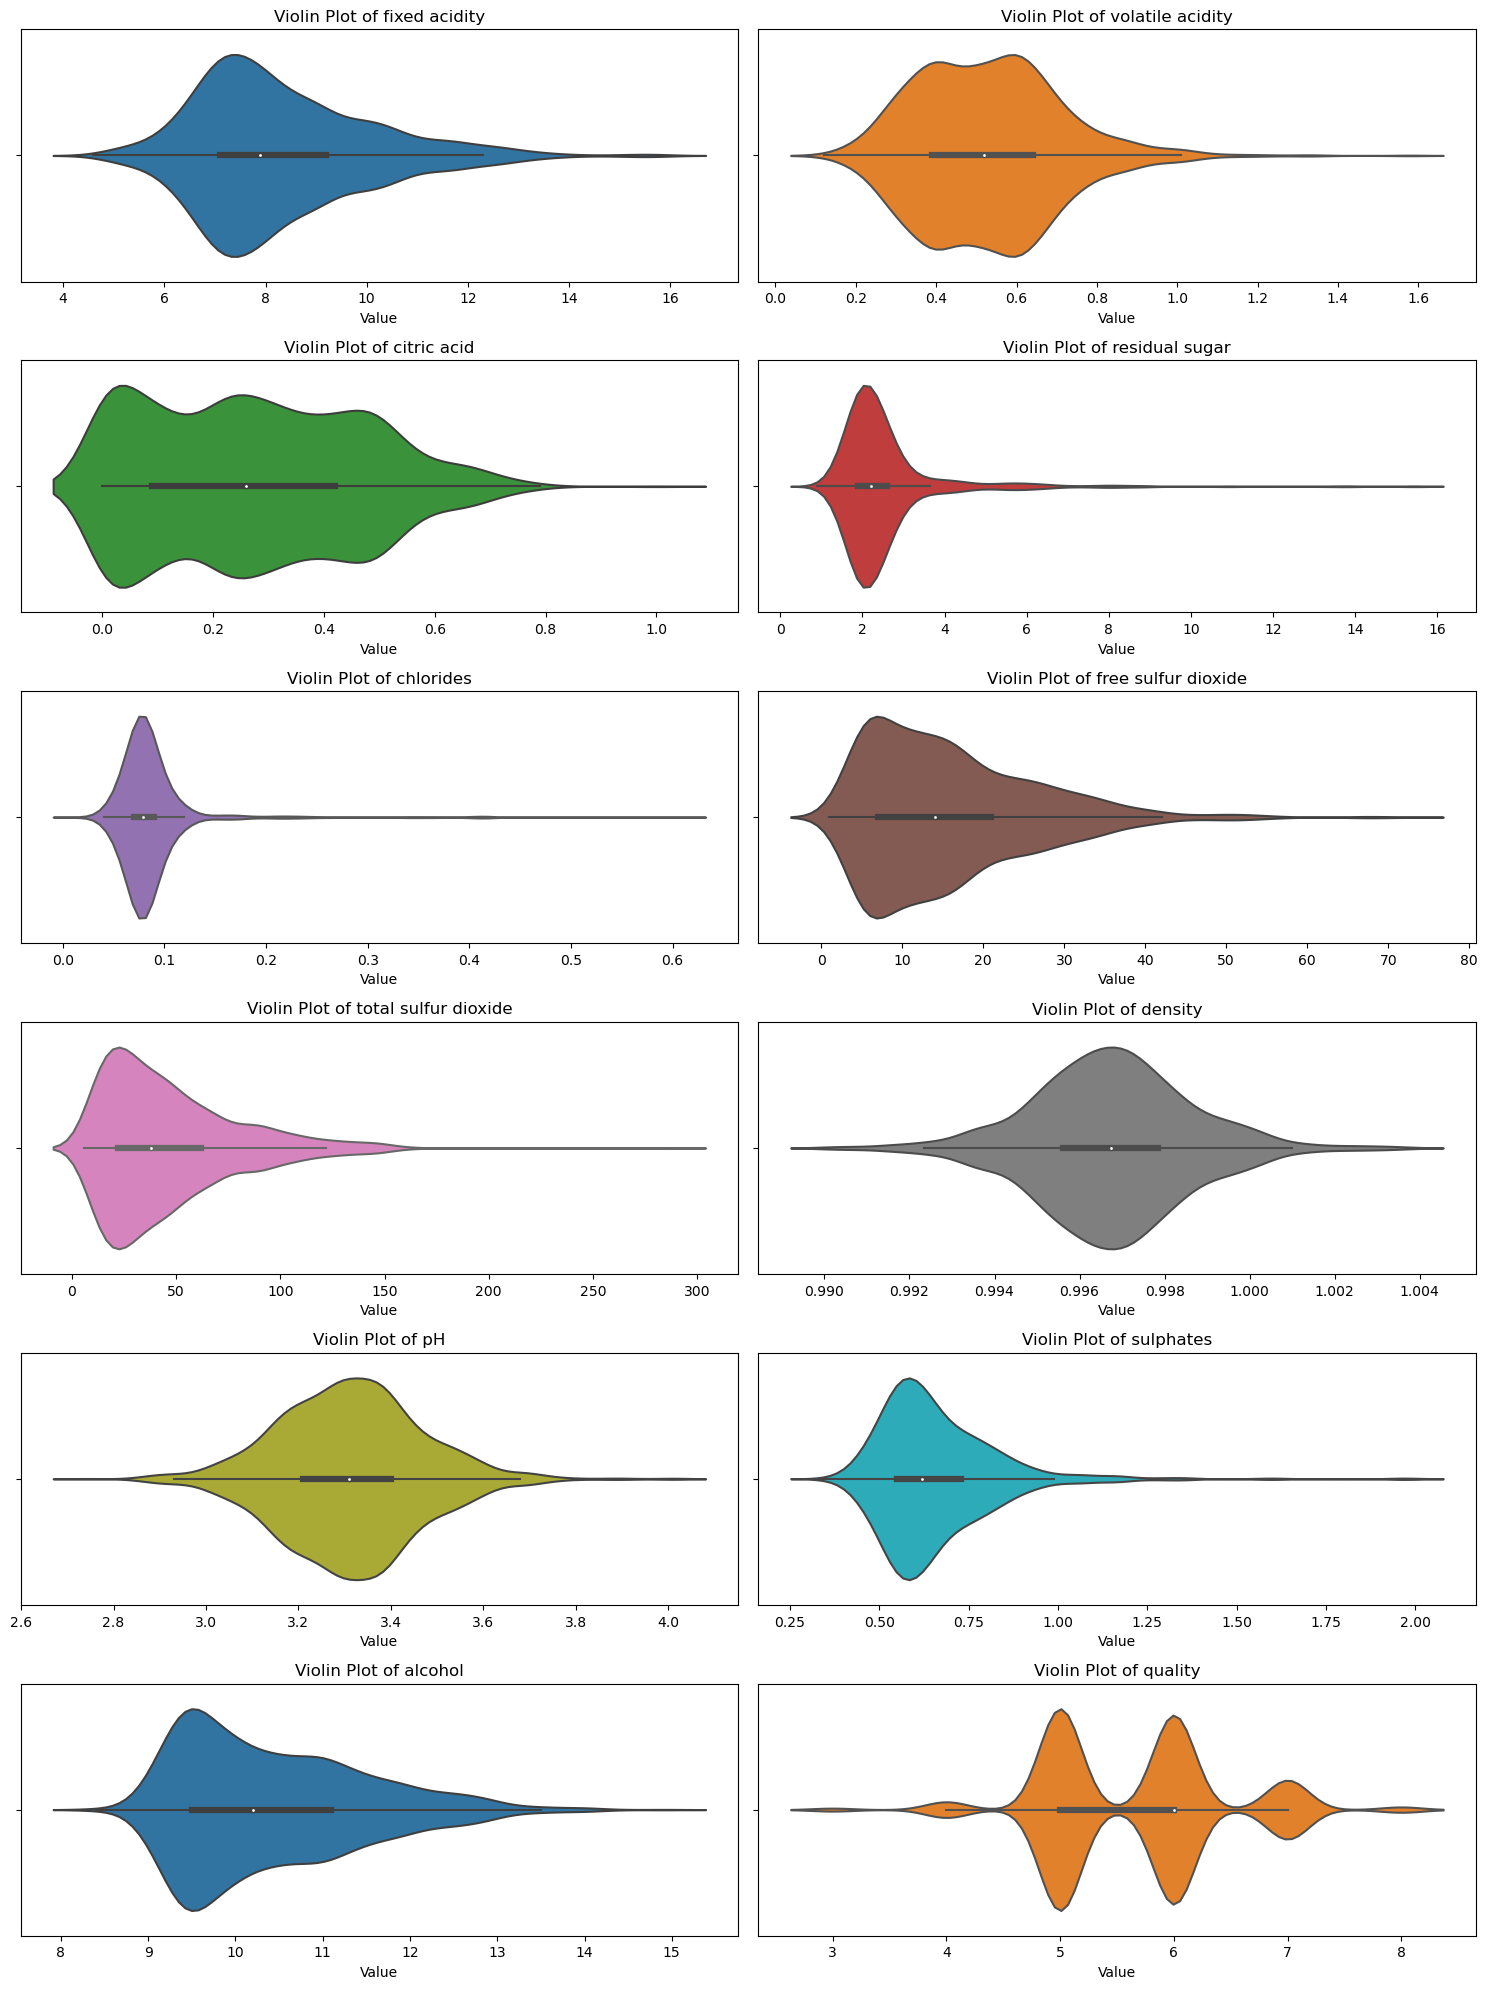

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
import math

# 그리드 생성
num_cols = len(df.columns)
num_rows = math.ceil(num_cols / 2)  # 2열로 나누어 그리기

fig, axes = plt.subplots(num_rows, 2, figsize=(15, 20))

# 각 열의 boxplot을 서브플롯에 그리기
for i, column in enumerate(df.columns):
    row_index = i // 2
    col_index = i % 2
    sns.violinplot(x=df[column], ax=axes[row_index, col_index], color=colors[i % len(colors)])  # 색상 코드 직접 지정
    axes[row_index, col_index].set_title(f'Violin Plot of {column}')
    axes[row_index, col_index].set_xlabel('Value')

# 남은 subplot 숨기기
for i in range(num_cols, num_rows * 2):
    fig.delaxes(axes.flatten()[i])

# 레이아웃 조정
plt.tight_layout()
plt.show()

#### Violin Plot(2)

다음 나타낸 violinplot은 각 독립변수의 quality별로 나타낸 것이다. 

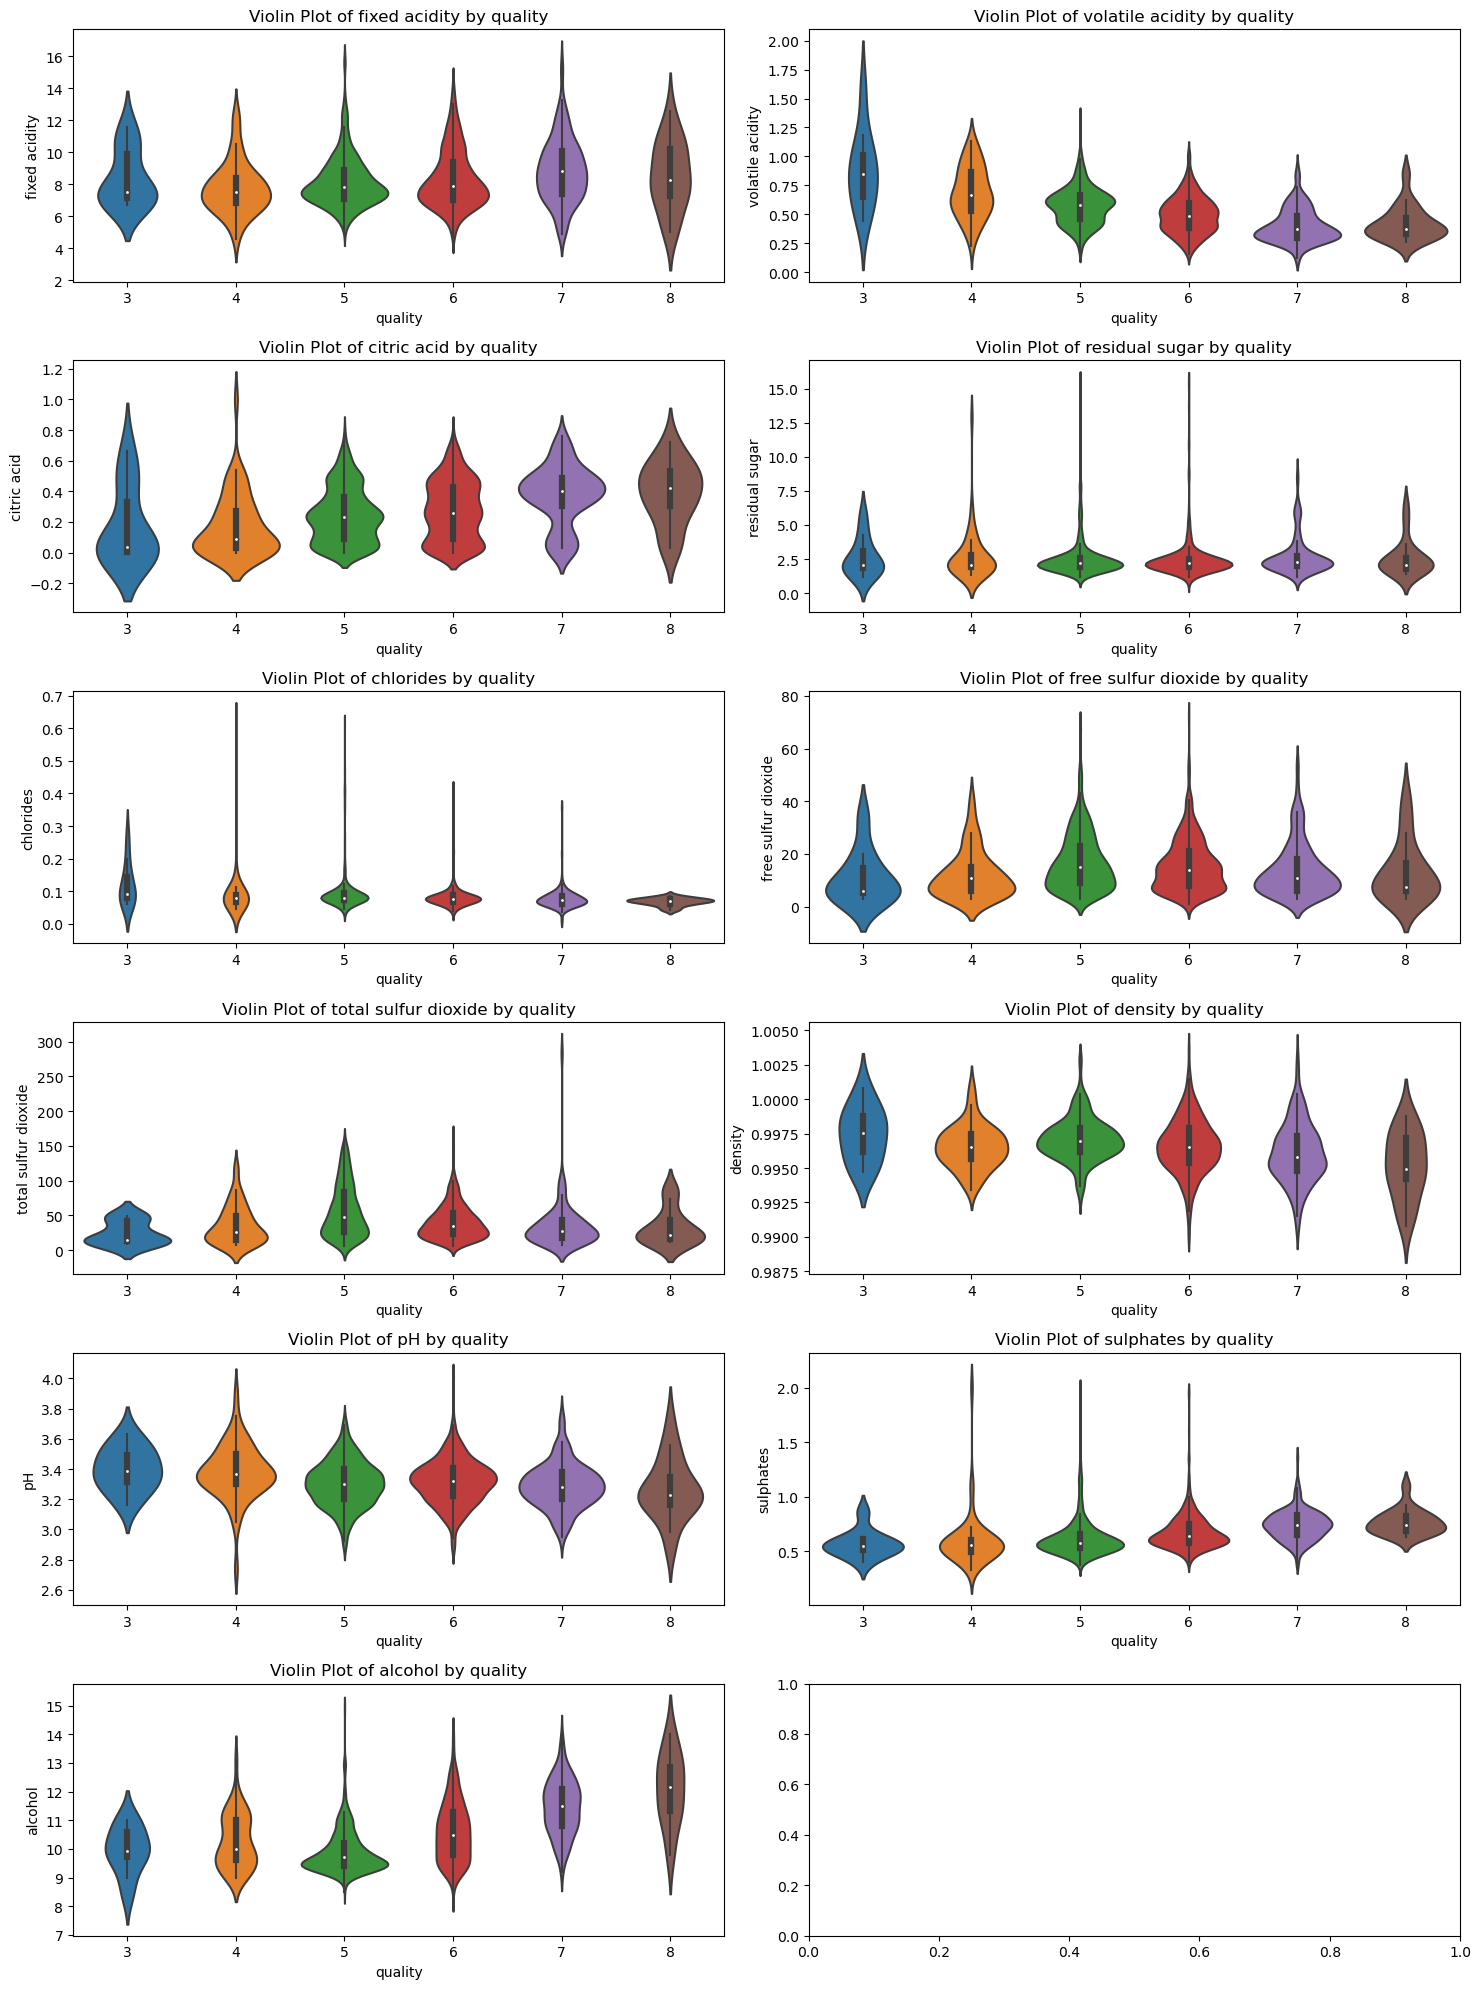

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
import math

# 그리드 생성
num_cols = len(df.columns)
num_rows = math.ceil(num_cols / 2)  # 2열로 나누어 그리기

fig, axes = plt.subplots(num_rows, 2, figsize=(15, 20))

# 각 열의 독립변수들의 violin plot을 서브플롯에 그리기
for i, column in enumerate(df.columns[:-1]):  # 마지막 열은 종속 변수이므로 제외
    row_index = i // 2
    col_index = i % 2
    sns.violinplot(x=df[df.columns[-1]], y=df[column], ax=axes[row_index, col_index])  # violin plot 그리기
    axes[row_index, col_index].set_title(f'Violin Plot of {column} by {df.columns[-1]}')
    axes[row_index, col_index].set_xlabel(df.columns[-1])
    axes[row_index, col_index].set_ylabel(column)

# 남은 subplot 숨기기
for i in range(num_cols, num_rows * 2):
    fig.delaxes(axes.flatten()[i])

# 레이아웃 조정
plt.tight_layout()
plt.show()

## 3. 변수간의 상관관계 시각화

### [독립변수들 간의 상관관계]

### 3.1 히트맵

<상관관계 & 인과관계> 변수 간의 관계: 두 변수의 값이 함께 증가하거나 감소하는 경우에 두 변수 간의 관계가 있다고 설명합니다. 예를 들어 "근무 시간"과 "소득"의 경우, 근무 시간이 증가함에 따라 소득도 증가하는 관계가 있습니다. 마찬가지로 "물가"와 "구매력"의 경우, 상품 가격이 증가하면 구매력이 감소할 수 있습니다.

상관관계: 상관관계는 두 개 이상의 변수 간의 크기와 방향을 나타내는 통계적 측정값으로 정의됩니다. 이는 변수들이 함께 움직이는 정도를 양적으로 표현합니다. 그러나 상관관계가 있더라도 인과관계가 자동으로 의미하는 것은 아닙니다. 다시 말해, 두 변수가 상관관계가 있다고 해도 한 변수의 변화가 다른 변수의 변화를 일으킨다는 의미는 아닙니다.

인과관계: 인과관계는 두 사건 간에 원인과 결과의 관계가 있음을 나타냅니다. 한 사건이 다른 사건의 결과로 나타날 때 두 사건 간에 인과관계가 있다고 말합니다. 예를 들어, 흡연이 폐암 발생 위험을 증가시킨다는 것은 인과관계의 예입니다. 그러나 이론적으로는 인과관계를 명확히 구분하는 것이 간단하지만 실제로는 어려울 수 있습니다. 예를 들어, 흡연은 알코올 중독과 상관관계가 있을 수 있지만 흡연이 알코올 중독을 일으키는 것은 아닐 수 있습니다.

요약하면, 상관관계는 통계적 관계의 강도와 방향을 측정하며, 인과관계는 변수 간의 직접적인 인과 관계를 나타냅니다. 인과관계를 확립하는 것은 실제로는 어려울 수 있으며, 상관관계는 자동으로 인과관계를 의미하지 않습니다.

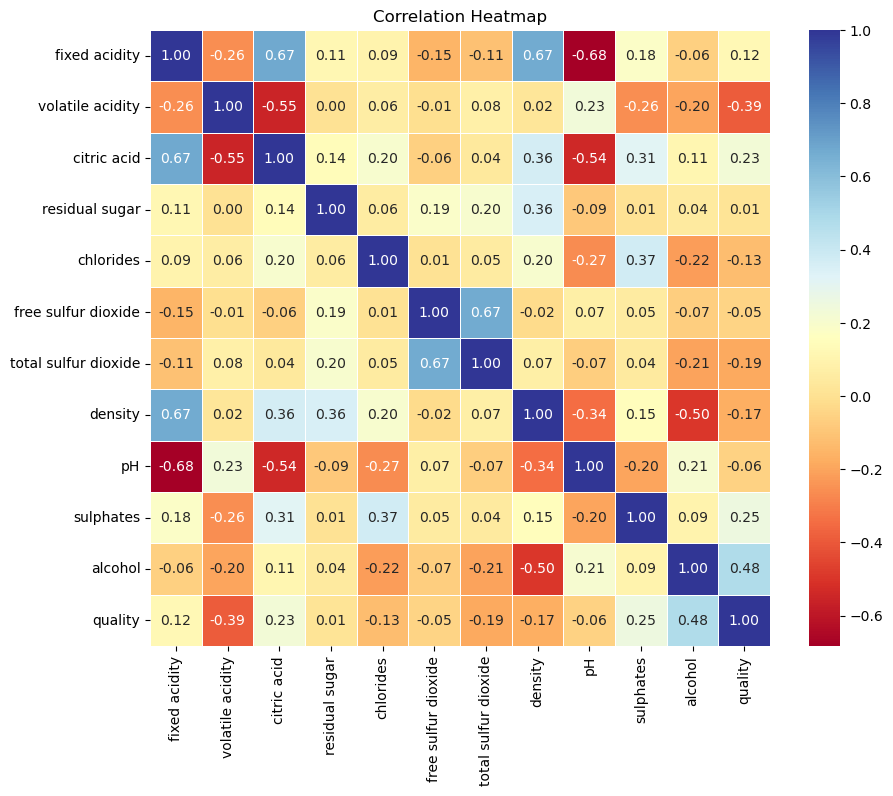

In [41]:
# 상관관계 행렬 계산
correlation_matrix = df.corr()

# 상관관계 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlBu', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

<결과 해석>

1. 다중공선성 문제 있음
2. 'free sulfur dioxide'와 'total_sulfur_dioxide' 변수 간에 상대적으로 높은 양의 상관관계(0.67, 양의 상관)를 볼 수 있습니다.
3. 'pH'와 'fixed_acidity' 변수 간에는 상대적으로 높은 음의 상관관계(-0.68, 음의 상관)가 있습니다.
4. 그리고 다른 몇 가지 변수 간에는 약 0.5 정도의 상관관계가 있습니다.

결론: 이러한 이유로 기계 학습 모델을 구축할 때 주의해야 합니다.

### 3.2 Pair plot

<pairplot이란?>

1. 변수간의 상관관계:
산점도를 통해 변수 간의 선형 또는 비선형 상관관계를 확인/두 변수 간의 점들이 어떻게 분포되어 있는지를 확인하여 상관성의 강도와 방향을 파악

2. 변수의 분포:
변수가 정규분포에 가까운지, 왜도가 있는지, 이상치가 있는지 등을 확인

3. 이상치 식별:
산점도에서 특이한 점들이 나타나면 이는 이상치일 가능성/이상치가 어떤 변수들 간에 나타나는지 확인

4. 다중 공선성:
변수 간의 강한 상관관계는 다중 공선성의 가능성/다중 공선성은 회귀 분석 등에서 문제를 일으킬 수 있는데, Pairplot을 통해 변수 간의 상관성을 시각적으로 확인

5. 클래스 간의 차이:
데이터가 여러 클래스로 나누어져 있는 경우, 클래스 간의 차이를 확인

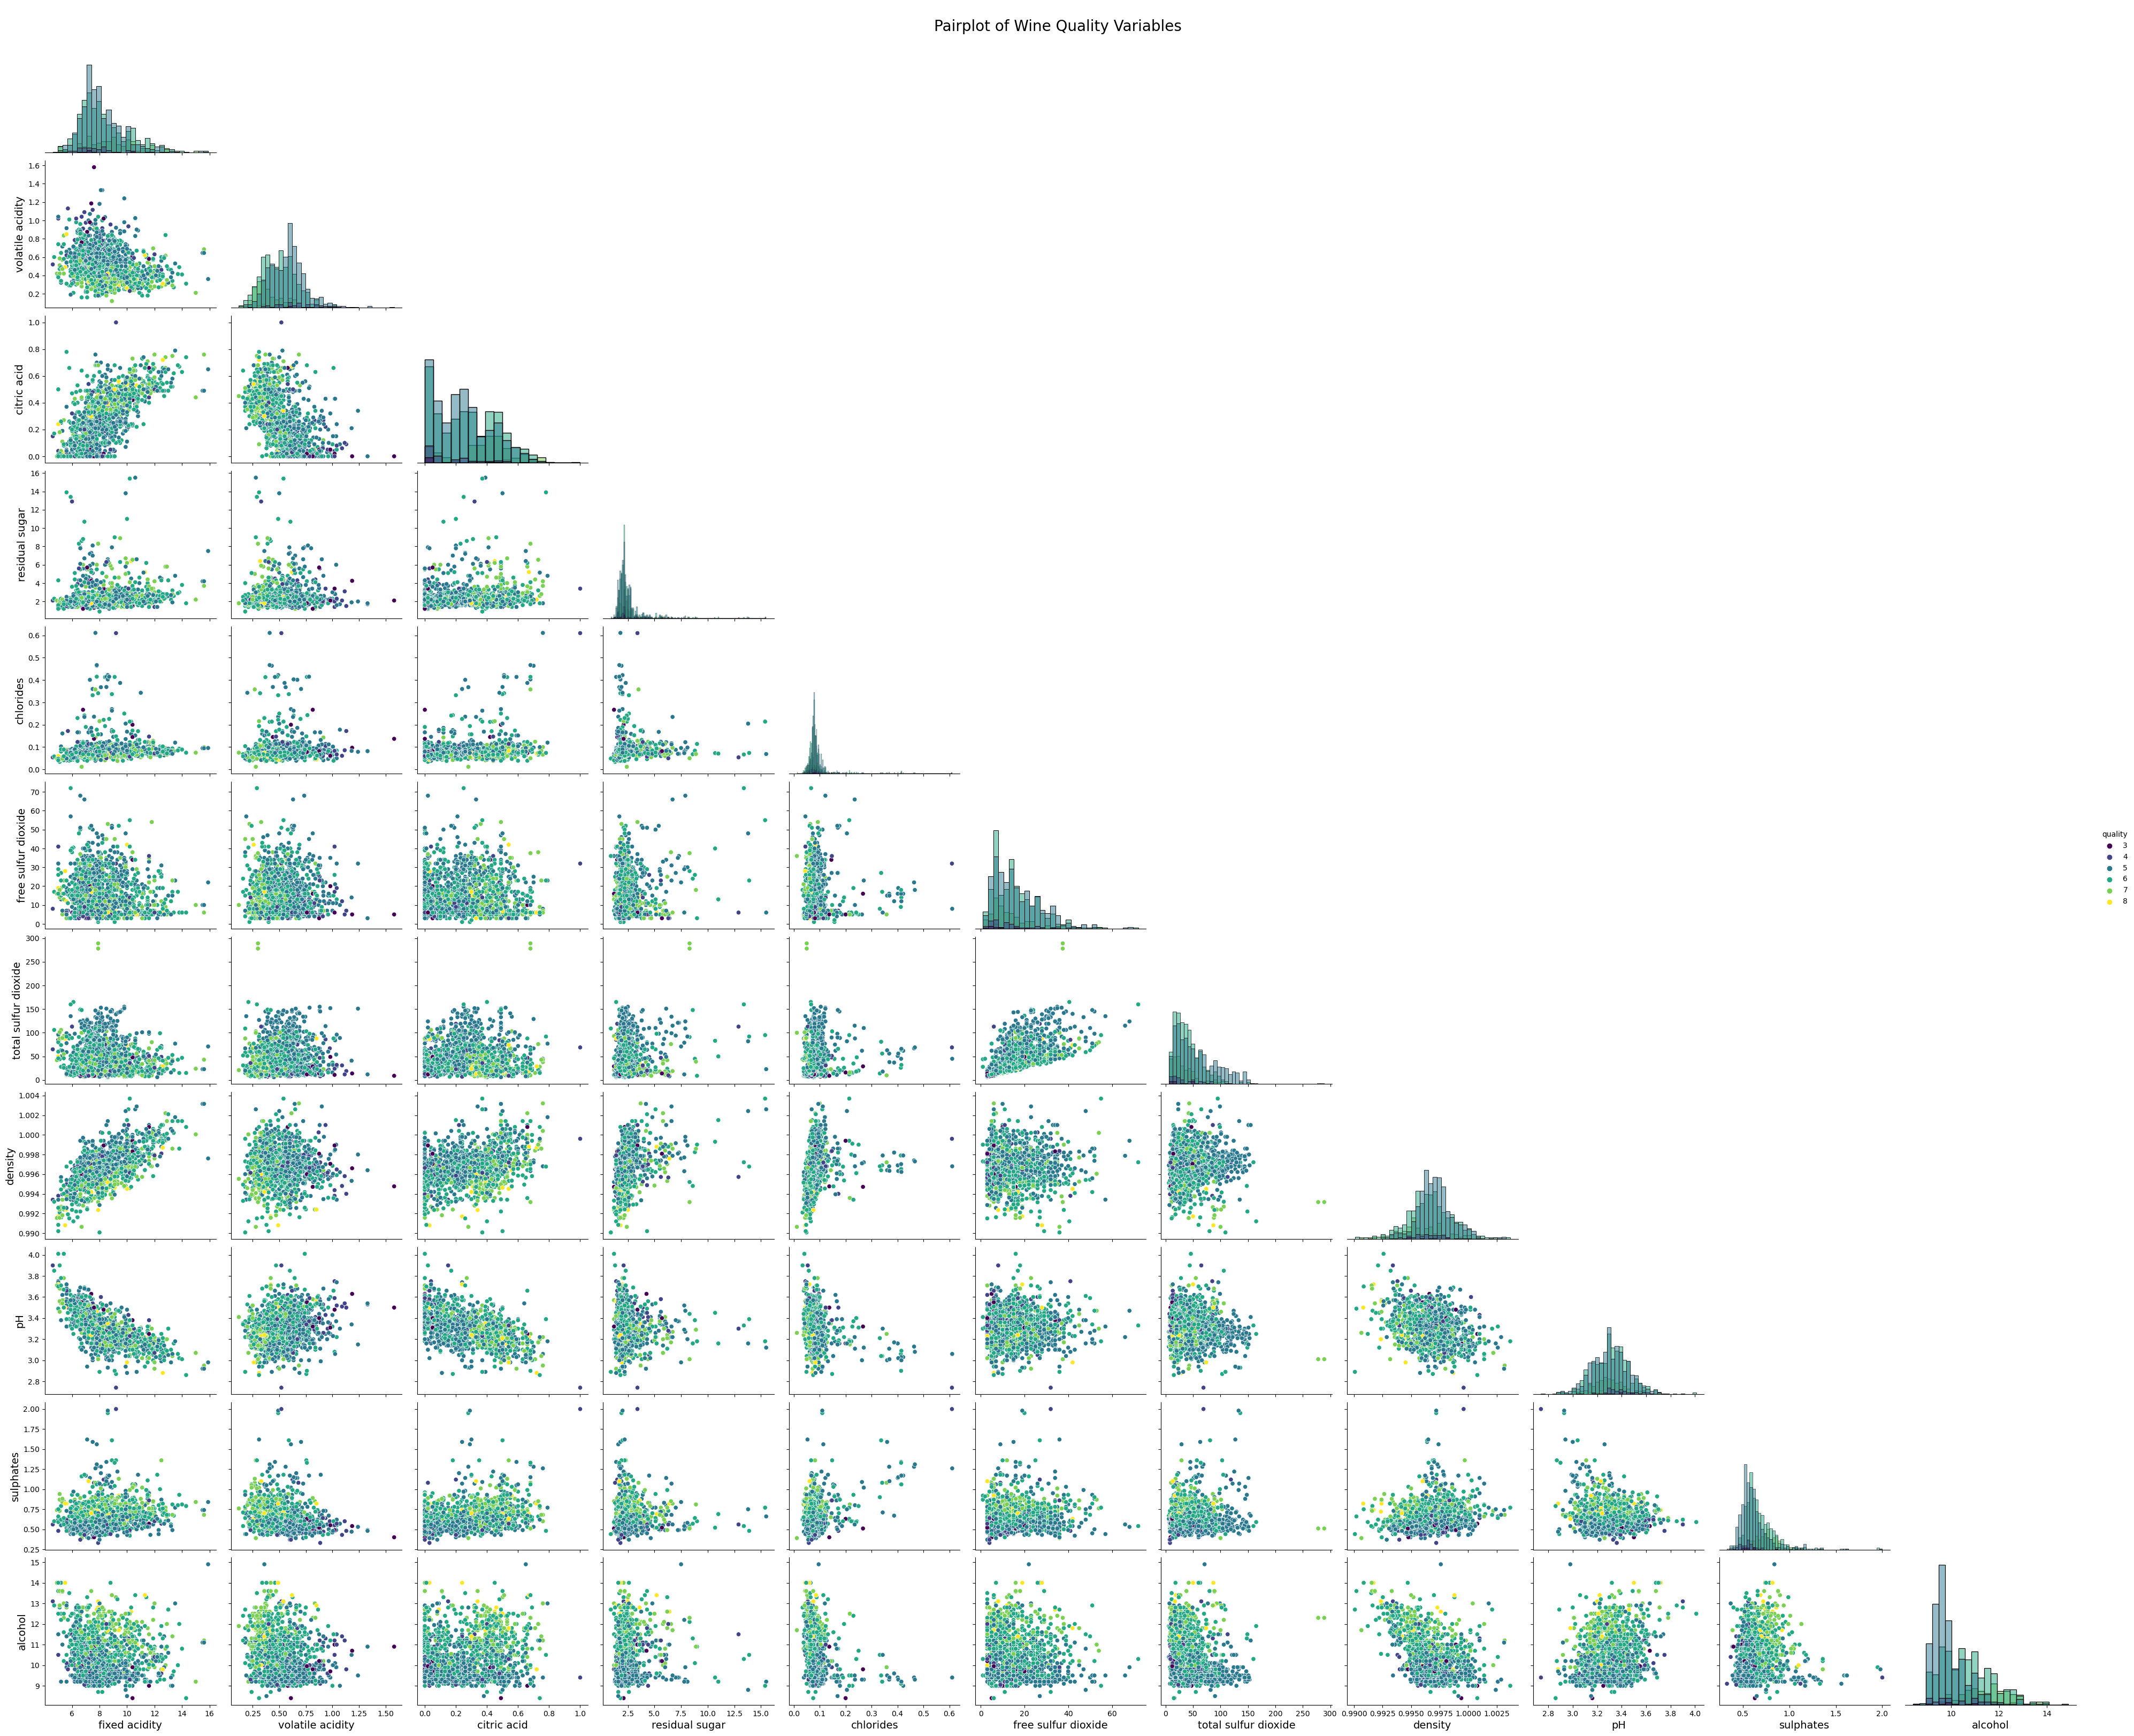

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot 생성
pairplot = sns.pairplot(df, diag_kind="hist", hue="quality", height=3, 
                        palette="viridis", aspect=1.2, corner=True)

# 제목 크기 조정
pairplot.fig.suptitle("Pairplot of Wine Quality Variables", size=20)

# x, y 축 레이블 크기 및 제목 크기 조정
for ax in pairplot.axes[:, 0]:  # 첫 번째 열의 축에 대해서만 레이블을 설정합니다.
    ax.set_ylabel(ax.get_ylabel(), fontsize=14)

for ax in pairplot.axes[-1, :]:  # 마지막 행의 축에 대해서만 레이블을 설정합니다.
    ax.set_xlabel(ax.get_xlabel(), fontsize=14)

# 플롯 표시
plt.show()

### 3.3 회귀플롯 (Regression plot)

<Regolot이란?>

- RegPlot은 Regression Plot의 약자이다.
- 데이터의 분포와, 이 데이터를 선형으로 표현하는 Regression Line을 동시에 표현해주는 그래프이다.

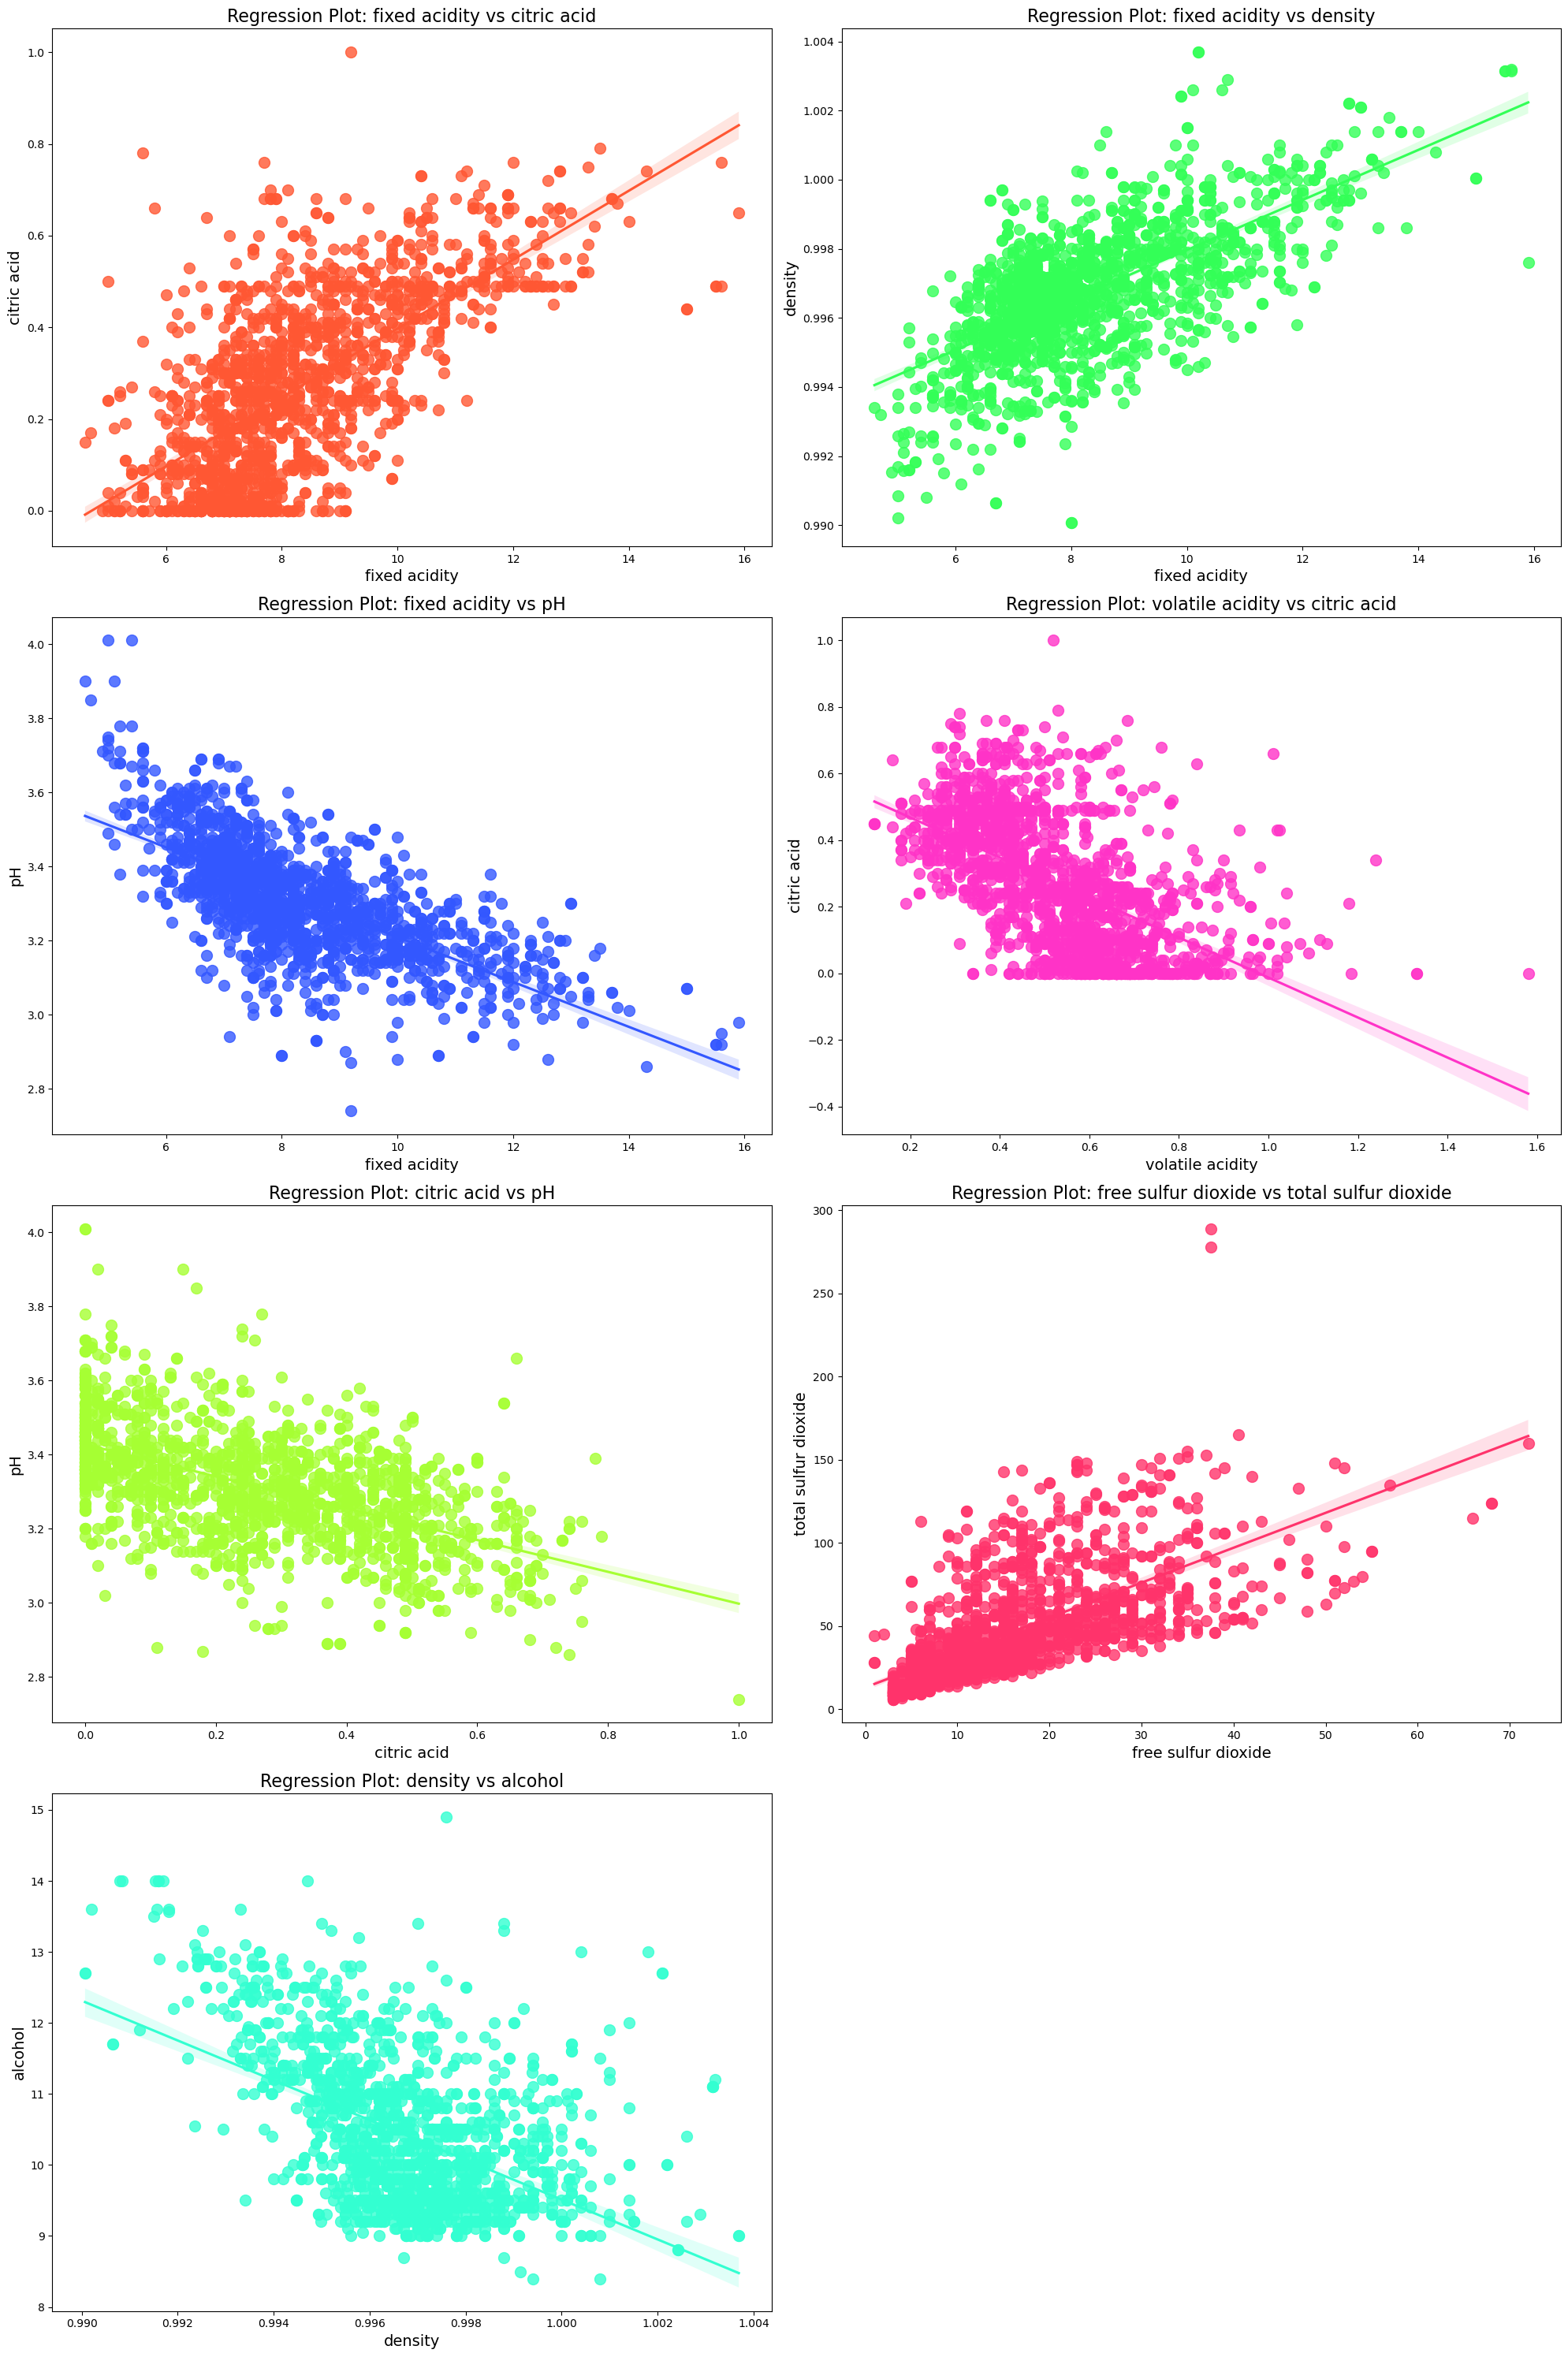

In [42]:
selected_variables = [
    ("fixed acidity", "citric acid", "#FF5733"),  # Orange
    ("fixed acidity", "density", "#33FF57"),  # Green
    ("fixed acidity", "pH", "#3357FF"),  # Blue
    ("volatile acidity", "citric acid", "#FF33C7"),  # Pink
    ("citric acid", "pH", "#A6FF33"),  # Lime
    ("free sulfur dioxide", "total sulfur dioxide", "#FF336B"),  # Red
    ("density", "alcohol", "#33FFD1"),  # Cyan
]

# 그리드 생성
fig, axes = plt.subplots(4, 2, figsize=(20, 30))
axes = axes.flatten()

# 선택한 변수에 대한 산점도 및 회귀선 그리기
for i, (x_var, y_var, color) in enumerate(selected_variables):
    sns.regplot(ax=axes[i], x=x_var, y=y_var, data=df, color=color, scatter_kws={'s': 100})
    axes[i].set_title(f"Regression Plot: {x_var} vs {y_var}", fontsize=16)
    axes[i].set_xlabel(f"{x_var}", fontsize=14)
    axes[i].set_ylabel(f"{y_var}", fontsize=14)

# 남은 subplot 숨기기
for i in range(len(selected_variables), len(axes)):
    fig.delaxes(axes[i])

# 레이아웃 조정
plt.tight_layout()
plt.show()

<결과해석>
- 절댓값으로 한 값으로 0.5 이상인 관계만 나타내었음 (7가지 관계)
- 상관관계를 갖고 있는 것으로 보이나 데이터의 분포가 집중적이지만은 않다
- 모델적용시 고려는 해야 할 부분이다

### 3.4 독립변수간의 산점도

독립변수들 간의 상관관계에 규칙성이 있는지 파악하기 위하여 다음과 같이 산점도를 그렸으며 각 데이터의 quality에 따라서 다른 색을 부여했다. 그러나 전반적으로 제시된 변수들 외에도 뚜렷한 상관관계를 발견하기 어려웠다.

#### (1) 잔당-pH

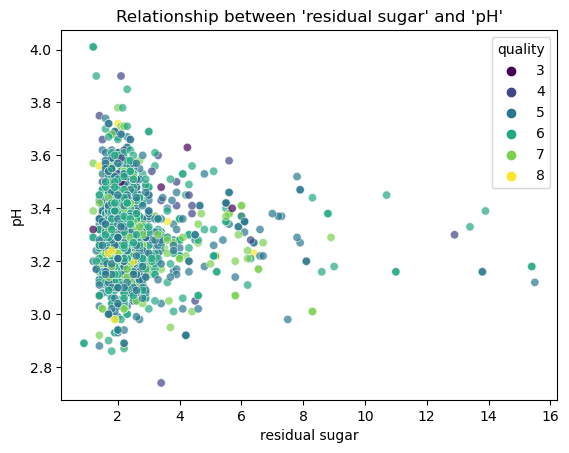

In [66]:
# 투명도 설정
alpha_value = 0.7

# Scatter plot 생성
sns.scatterplot(x="residual sugar", y="pH", hue="quality", 
                palette="viridis", alpha=alpha_value, data=df)

# 그래프 제목 설정
plt.title("Relationship between 'residual sugar' and 'pH'")

# 그래프 표시
plt.show()

#### (2) 알코올-pH

<결과 해석> 잔당과 pH 사이의 상관관계를 발견하기 어렵다

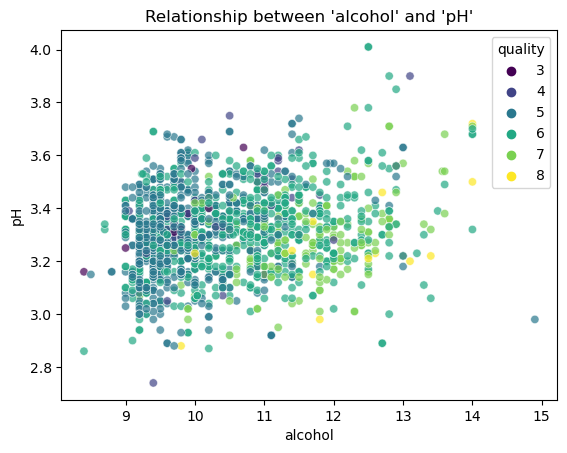

In [67]:
# Scatter plot 생성
sns.scatterplot(x="alcohol", y="pH", hue="quality", 
                palette="viridis", alpha=alpha_value, data=df)

# 그래프 제목 설정
plt.title("Relationship between 'alcohol' and 'pH'")

# 그래프 표시
plt.show()

<결과 해석> 알코올과 pH 사이의 상관관계를 발견하기 어렵다

### [독립변수와 종속변수와의 상관관계]

### 3.5 산점도 (Scatter plot)

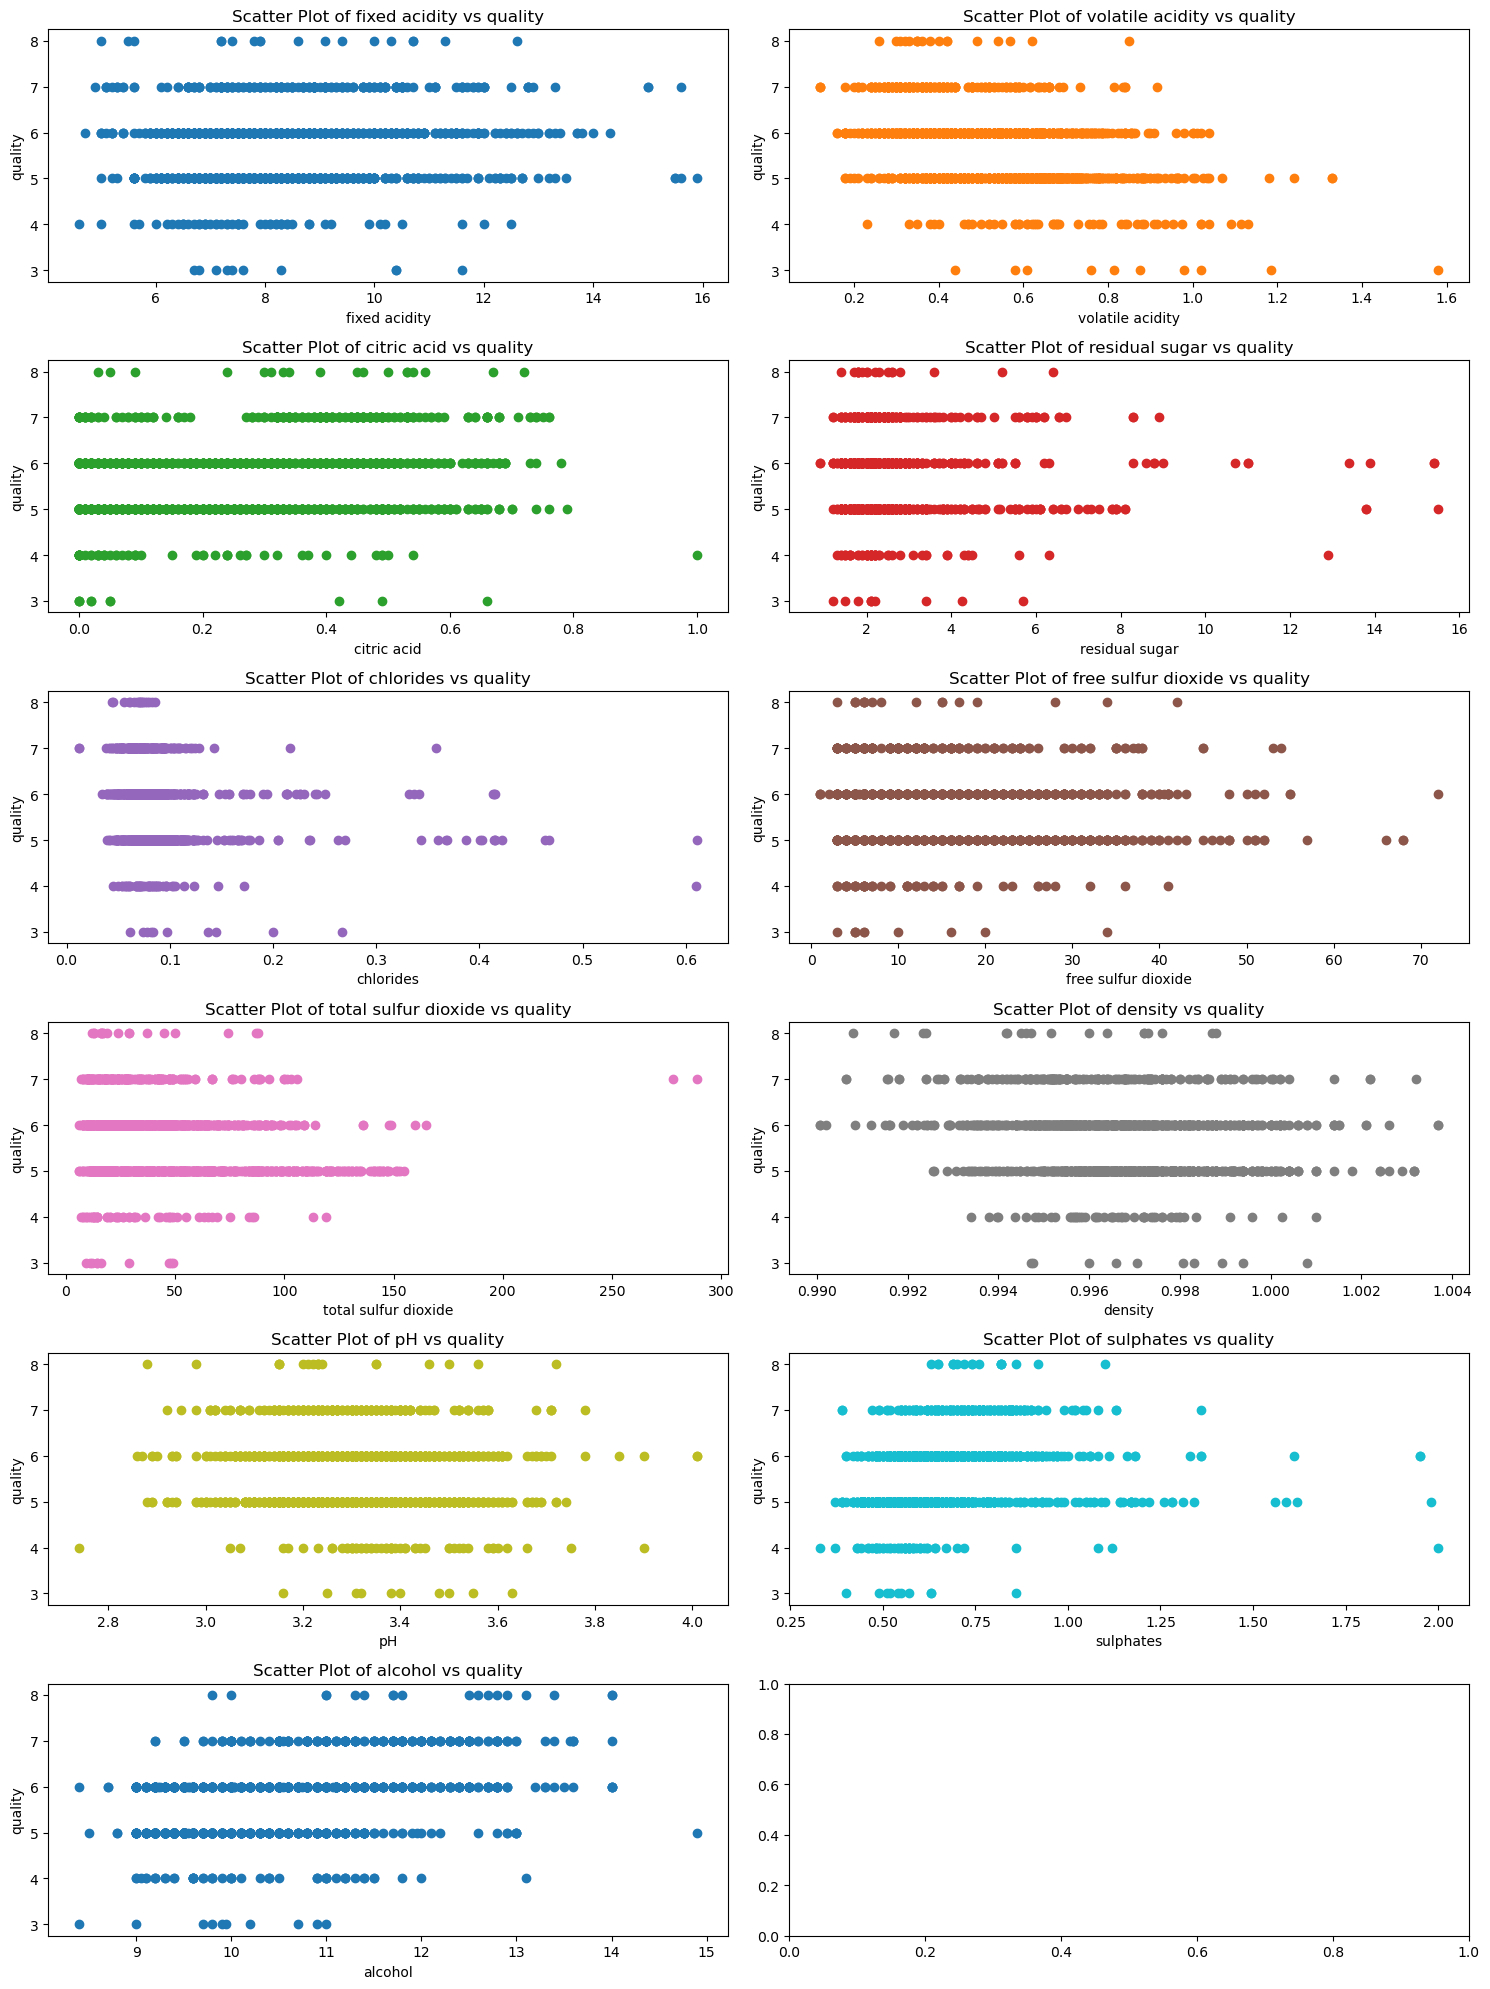

In [43]:
# 그리드 생성
num_cols = len(df.columns)
num_rows = math.ceil(num_cols / 2)  # 2열로 나누어 그리기

fig, axes = plt.subplots(num_rows, 2, figsize=(15, 20))

# 각 열의 독립변수들의 분포를 서브플롯에 그리기
for i, column in enumerate(df.columns[:-1]):  # 마지막 열은 종속 변수이므로 제외
    row_index = i // 2
    col_index = i % 2
    axes[row_index, col_index].scatter(df[column], df[df.columns[-1]], color=colors[i])  # 색상 적용
    axes[row_index, col_index].set_title(f'Scatter Plot of {column} vs {df.columns[-1]}')
    axes[row_index, col_index].set_xlabel(column)
    axes[row_index, col_index].set_ylabel(df.columns[-1])

# 남은 subplot 숨기기
for i in range(num_cols, num_rows * 2):
    fig.delaxes(axes.flatten()[i])

# 레이아웃 조정
plt.tight_layout()
plt.show()

### 3.6 Hexagonal Binned Plot (육각형 격자 그림)

* 설명

hexbin plot은 산점도를 히스토그램 형태의 육각형(binning)으로 표현한 그래픽이다. 이는 seaborn과 Matplotlib 같은 시각화 라이브러리에서 제공되며, 주로 두 변수 간의 관계를 효과적으로 시각화하기 위해 사용된다.

- 기존의 산점도와의 차별점

기존의 산점도는 데이터 포인트의 밀도가 높아질수록 점이 겹쳐져 가독성이 떨어질 수 있다. hexbin plot은 이러한 문제를 해결하기 위해 데이터를 육각형으로 나누고 각 육각형에 속하는 데이터 포인트의 개수를 색상으로 표현한다.

#### Hexbin (1) : Hexagon binning 일반형

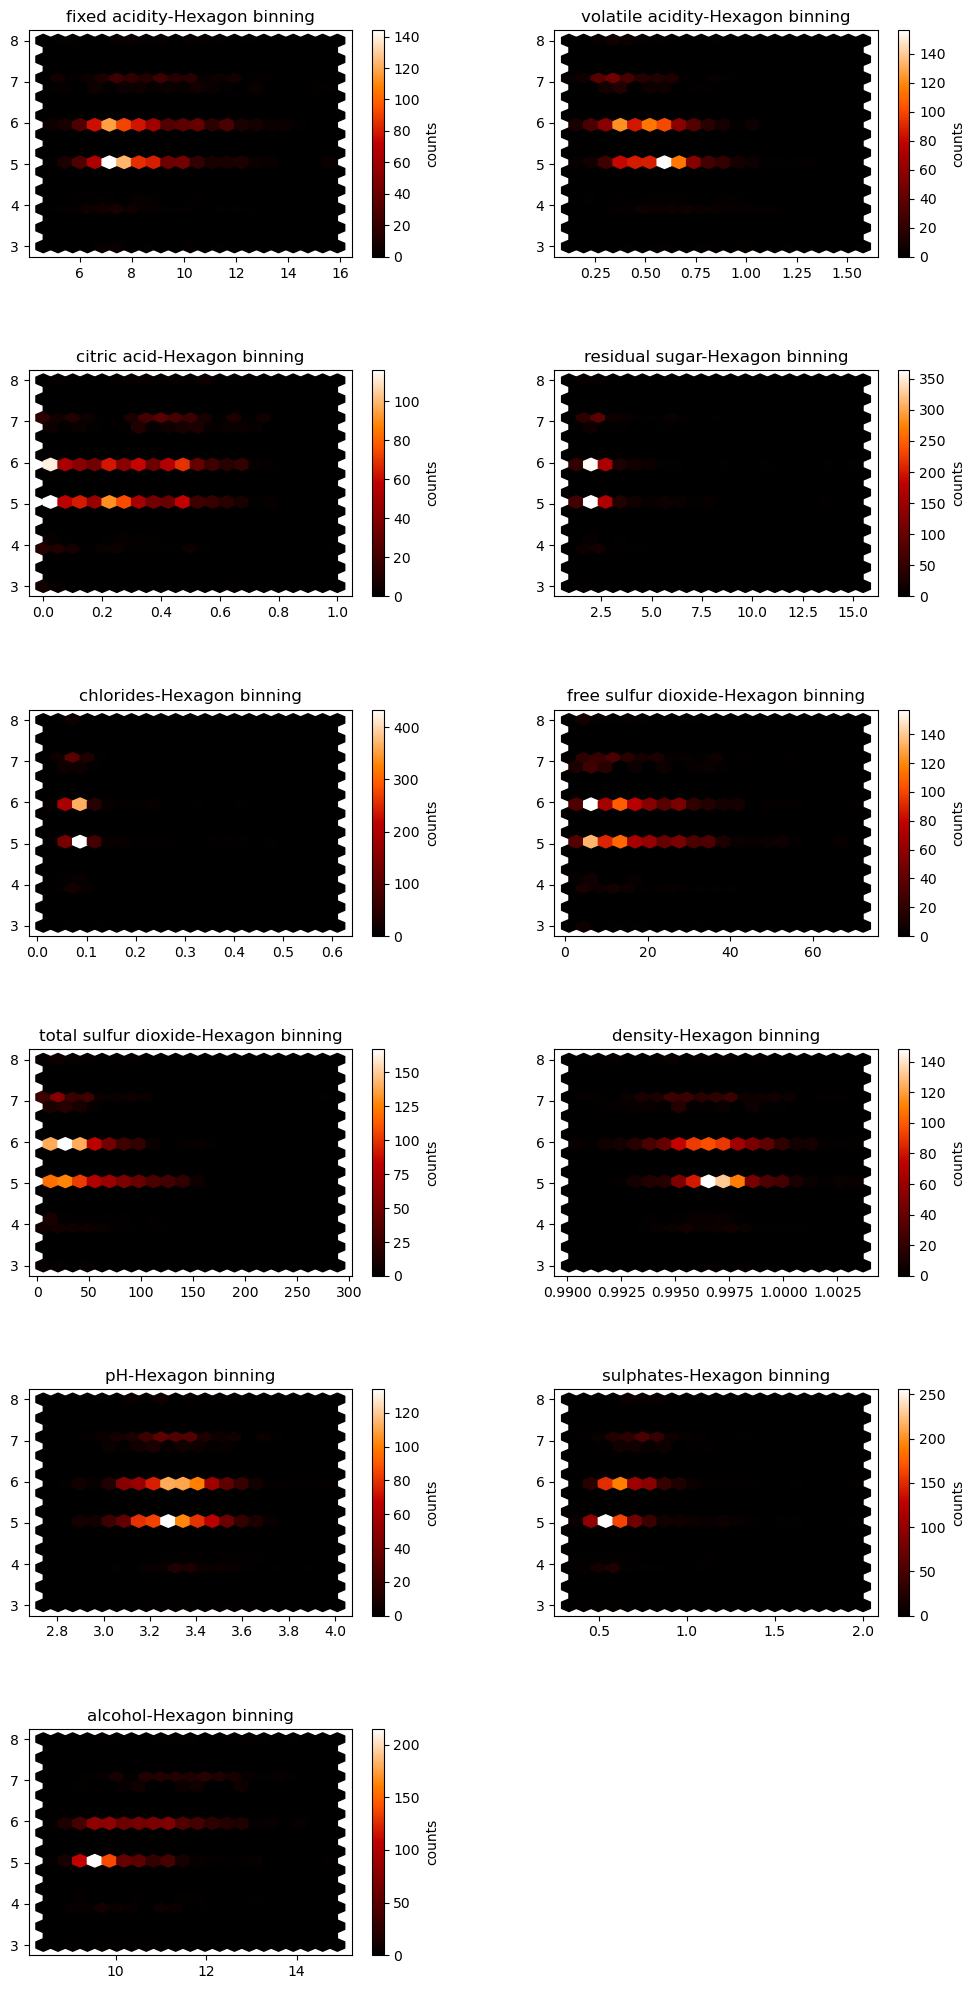

In [70]:
import matplotlib.pyplot as plt

# 독립변수들의 리스트
independent_variables = ["fixed acidity", "volatile acidity", "citric acid",
                         "residual sugar", "chlorides", "free sulfur dioxide",
                         "total sulfur dioxide", "density", "pH", "sulphates",
                         "alcohol"]
quality_variable = "quality"

# 그림의 크기 및 서브플롯 설정
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(12,25))
axes = axes.flatten()

# 반복문을 통한 서브플롯 생성
for i, ax in enumerate(axes):
    # 11개의 변수까지만 반복
    if i < len(independent_variables):
        hb = ax.hexbin(df[independent_variables[i]], df["quality"], gridsize = 20, cmap = 'gist_heat')
        ax.set_title(f"{independent_variables[i]}-Hexagon binning")
        cb = fig.colorbar(hb, ax = ax, label = 'counts')

    else:
        # 11개 이후의 서브플롯 삭제
        fig.delaxes(ax)
        
# 세로 간격 조절
plt.subplots_adjust(wspace=0.3, hspace=0.5)

plt.show()

#### Hexbin (2) : Hexbin With a log color scale

bins 매개변수는 히스토그램의 구간(bin)을 지정하며, 'log'로 설정하면 로그 스케일의 구간을 사용하게 됩니다. 이로 인해 빈도의 로그 스케일을 가진 플롯이 그려집니다.

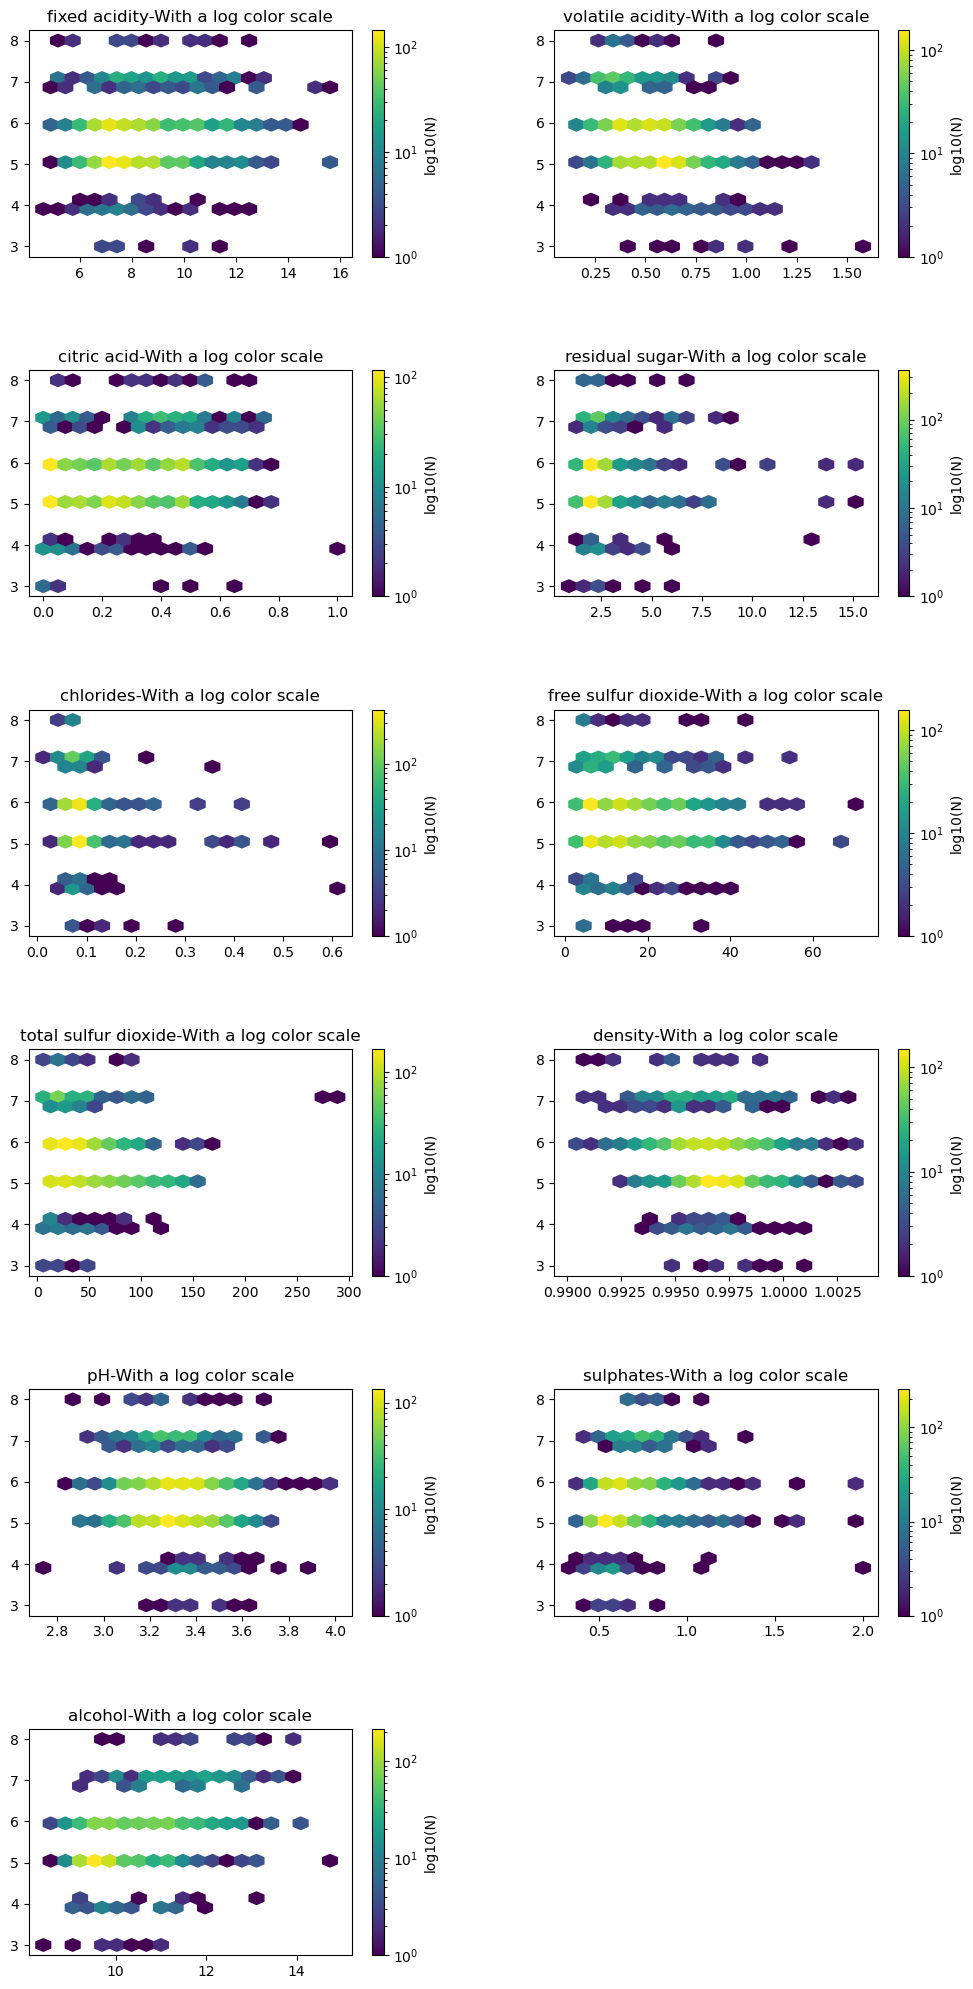

In [72]:
import matplotlib.pyplot as plt

# 독립변수들의 리스트
independent_variables = ["fixed acidity", "volatile acidity", "citric acid",
                         "residual sugar", "chlorides", "free sulfur dioxide",
                         "total sulfur dioxide", "density", "pH", "sulphates",
                         "alcohol"]
quality_variable = "quality"

# 그림의 크기 및 서브플롯 설정
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(12,25))
axes = axes.flatten()

# 반복문을 통한 서브플롯 생성
for i, ax in enumerate(axes):
    # 11개의 변수까지만 반복
    if i < len(independent_variables):
        hb = ax.hexbin(df[independent_variables[i]], df["quality"], gridsize = 20, bins = 'log',
                cmap = 'viridis')
        ax.set_title(f"{independent_variables[i]}-With a log color scale")
        cb = fig.colorbar(hb, ax = ax, label = 'log10(N)')

    else:
        # 11개 이후의 서브플롯 삭제
        fig.delaxes(ax)
        
# 세로 간격 조절
plt.subplots_adjust(wspace=0.3, hspace=0.5)

plt.show()

### 3.7 막대그래프

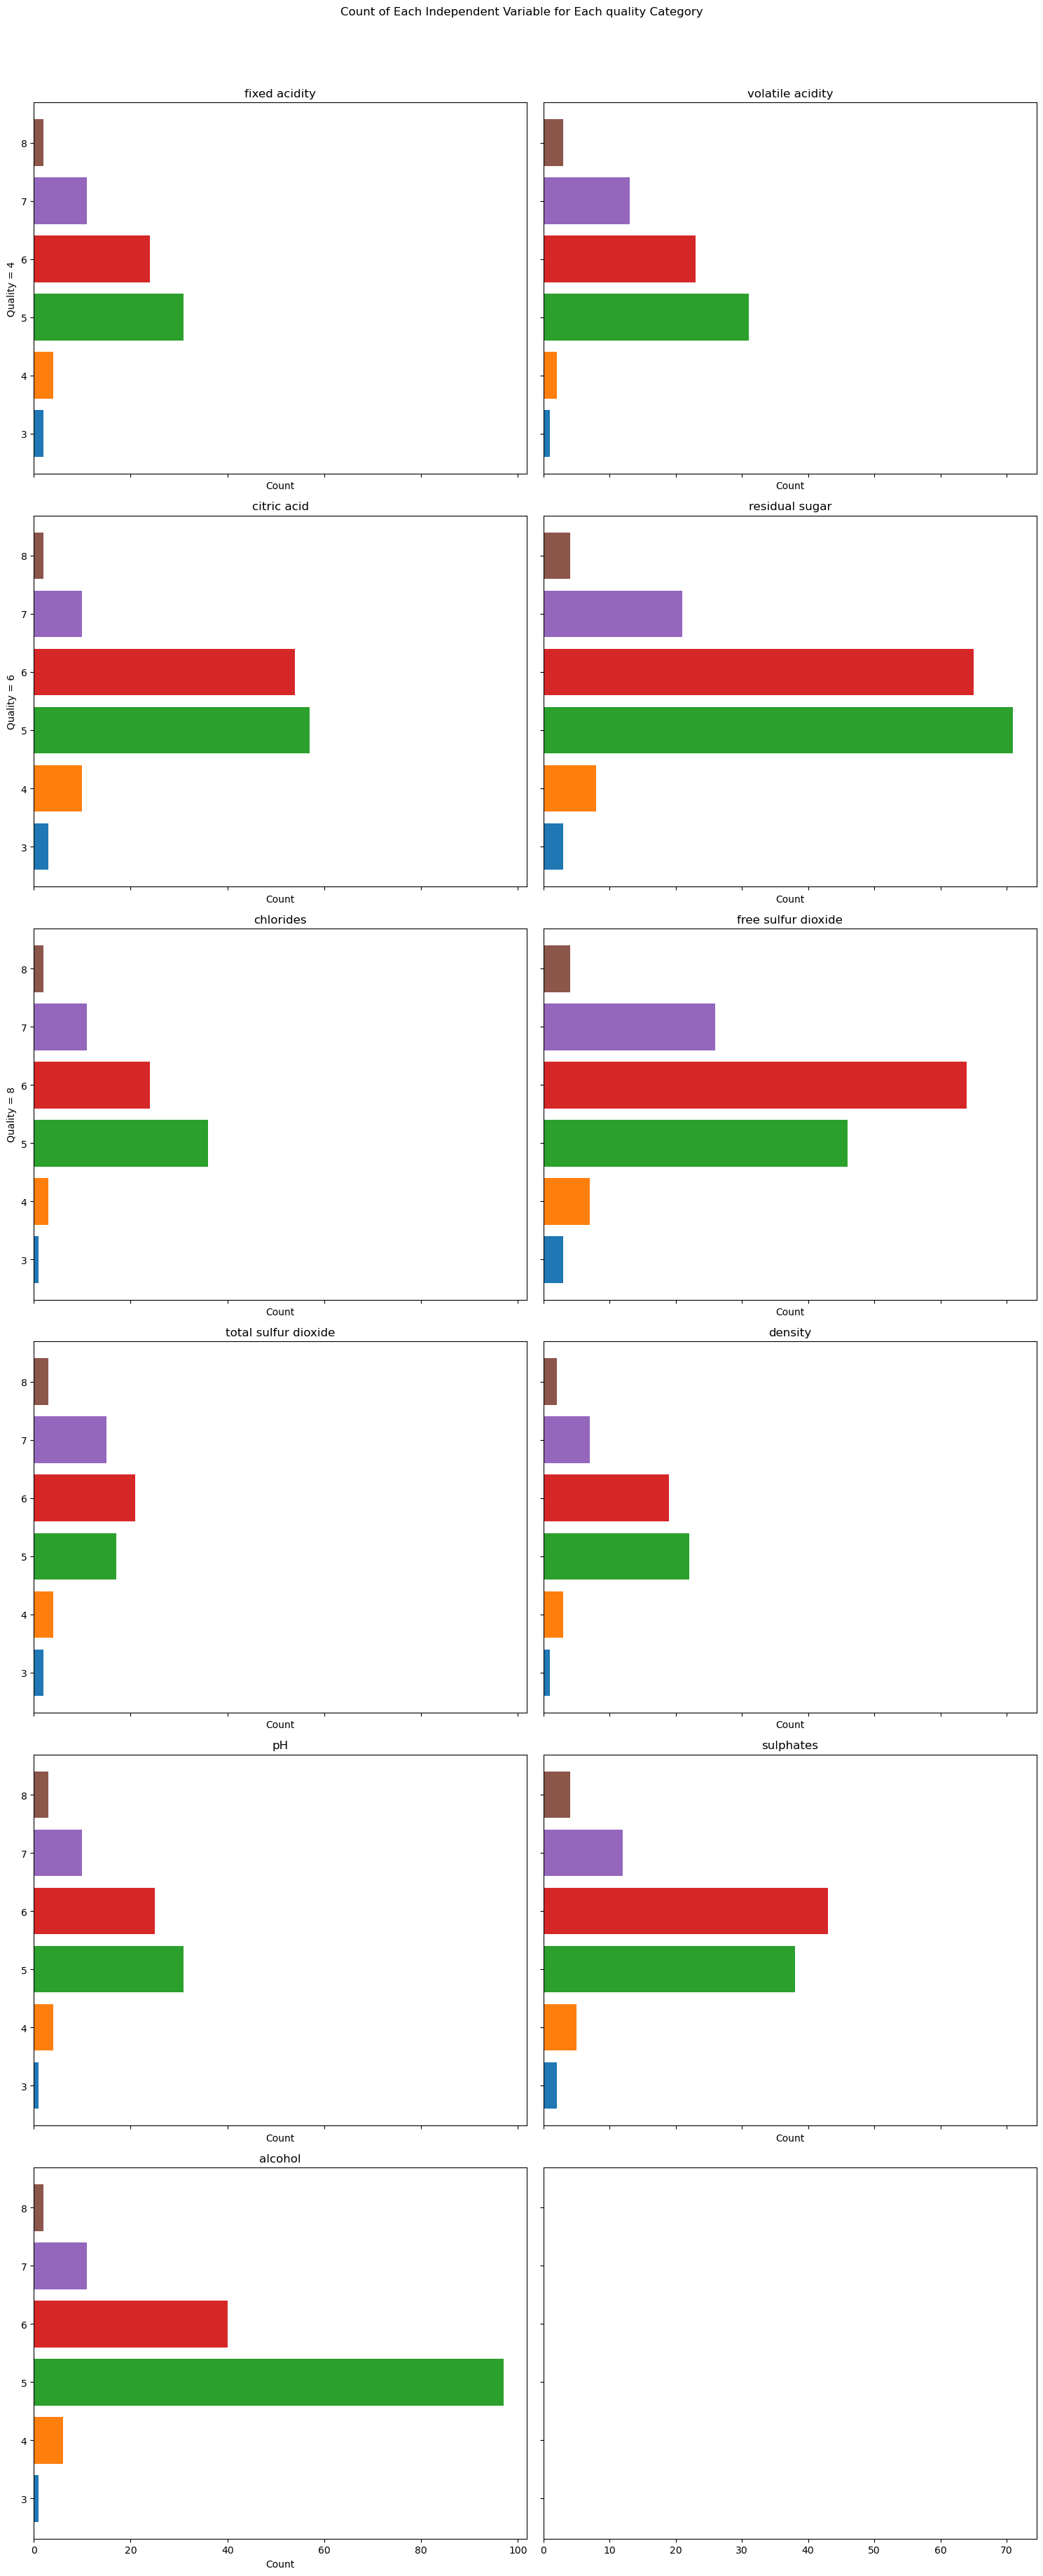

In [75]:
import matplotlib.pyplot as plt

# 종속변수 선택
dependent_variable = df.columns[-1]

# 독립변수 목록 선택 (마지막 열을 제외한 모든 열)
independent_variables = df.columns[:-1]

# 그리드 생성
num_cols = 2
num_rows = len(independent_variables) // num_cols + len(independent_variables) % num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 6 * num_rows), sharex='col', sharey='row')

# 모든 독립변수에 대해 각 quality 범주에 대한 값의 개수 막대그래프 그리기
for i, independent_variable in enumerate(independent_variables):
    row_index = i // num_cols
    col_index = i % num_cols
    
    for j, category in enumerate(sorted(df[dependent_variable].unique())):
        x_values = df[df[dependent_variable] == category][independent_variable].value_counts().index
        y_values = df[df[dependent_variable] == category][independent_variable].value_counts().values
        bars = axes[row_index, col_index].barh([category] * len(x_values), y_values, label=f"{dependent_variable}={category} {independent_variable}")
        
        # 각 막대 위에 숫자 표시 (숫자가 5개 이상일 때는 표시하지 않음)
        if len(x_values) <= 5:
            for bar, value in zip(bars, y_values):
                axes[row_index, col_index].text(bar.get_width(), bar.get_y() + bar.get_height() / 2, value,
                                                va='center', ha='left', color='black')

    # subplot에 x축 레이블 추가
    axes[row_index, col_index].set_xlabel("Count")

# 각 subplot에 제목 추가
for i, independent_variable in enumerate(independent_variables):
    row_index = i // num_cols
    col_index = i % num_cols
    axes[row_index, col_index].set_title(f"{independent_variable}")

# 각 subplot에 y축 레이블 추가
for i, dependent_variable_value in enumerate(sorted(df[dependent_variable].unique())):
    row_index = i // num_cols
    col_index = i % num_cols
    axes[row_index, 0].set_ylabel(f"Quality = {dependent_variable_value}")

fig.suptitle(f"Count of Each Independent Variable for Each {dependent_variable} Category", y=1.02)
fig.tight_layout()
plt.show()

<결과 해석>

1. 실행 이유: 종속변수의 각 범주에 해당하는 독립변수의 개수와 종속변수의 상관관계가 있을까하고 막대그래프를 그렸다.

2. 결과 해석 : 큰 상관관계는 없는 것으로 보이는데, 이는 범주가 quality 5와 6일때 자체의 샘플수가 많은 것 때문에 x축 값이 높아보이는 확률이 높다고 생각한다. 정확한 분석을 위해서는 각 범주별 데이터의 개수를 동일하게 뽑아서 EDA 분석을 할 필요가 있어보인다. 즉, quality 3~8의 샘플수를 모두 동일하게 했을 때 막대그래프를 그려보거나 산점도를 그리면 유의미한 결과가 도출되지 않을까 생각한다.

### EDA에 대한 전반적인 해석

시각화 작업을 통해서 데이터 전처리가 꼭 필요하다는 판단이 내려졌다.

일단 가장 기본적인 전처리로는 중복된 데이터들은 제거하고 이상치 처리가 이루어져야 한다. 그러나 이상치의 수가 많은 만큼 이상치 제거보다는 대체를 하는 방향을 모색할 필요가 있어 보인다. 

이러한 전처리 과정 후에는 각 변수마다 데이터들이 정규분포를 따를 수 있도록 왜도, 첨도의 조절이 필요해 보인다. KNN 모델은 정규분포를 따르지 않는 데이터에 민감하게 반응하기 때문에 이러한 작업은 필수적이다. 또한 데이터마다 크기(숫자의 범위)가 다르면 KNN 모델 적용시 문제가 발생할 수 있으므로 정규화 또는 표준화 작업을 고려해야 한다. 

마지막으로 가장 걱정되는 사항으로 quality 클래스에 할당된 데이터의 수 차이가 너무 큰 것이다. 시각화 과정에서도 클래스의 불균형으로 독립변수와 종속변수의 산점도에서  상관관계를 분석해내기 어려웠다. 이러한 클래스의 불균형은 KNN 모델에 적용을 하게 될 시에 문제점을 발생시킬 수도 있는 부분이기 때문에 모델학습 과정에서 고려를 반드시 해야할 부분이다. 